In [1]:
import pandas as pd 
import matplotlib.pyplot as plt   
import matplotlib.dates as mdates

In [2]:
path = "air_quality.csv"
df = pd.read_csv(path)

df.head(20)

timestamp                                       station_name  \
0   2025-04-17 01:00:00  Hà Nội: Đại Học Bách Khoa cổng Parabol đường ...   
1   2025-04-17 01:00:00  Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuấ...   
2   2025-04-17 01:00:00                            Minh Khai - Bắc Từ Liêm   
3   2025-04-17 01:00:00     Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK)   
4   2025-04-17 01:00:00  Hải Dương: UBND TP. Hải Dương - 106 Đường Trần...   
5   2025-04-17 01:00:00           Thừa Thiên Huế: 83 đường Hùng Vương (KK)   
6   2025-04-17 01:00:00  Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông -...   
7   2025-04-17 01:00:00  Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên...   
8   2025-04-17 01:00:00                Quảng Bình: Khu kinh tế Hòn La (KK)   
9   2025-04-17 01:00:00                        Trà Vinh: Tp. Trà Vinh (KK)   
10  2025-04-17 02:00:00  Hà Nội: Đại Học Bách Khoa cổng Parabol đường ...   
11  2025-04-17 02:00:00  Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuấ...   
12  2025-04-17 02:00:00                            Minh Khai - Bắc Từ Liêm   
13  2025-04-17 02:00:00     Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK)   
14  2025-04-17 02:00:00  Hải Dương: UBND TP. Hải Dương - 106 Đường Trần...   
15  2025-04-17 02:00:00           Thừa Thiên Huế: 83 đường Hùng Vương (KK)   
16  2025-04-17 02:00:00  Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông -...   
17  2025-04-17 02:00:00  Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên...   
18  2025-04-17 02:00:00                Quảng Bình: Khu kinh tế Hòn La (KK)   
19  2025-04-17 02:00:00                        Trà Vinh: Tp. Trà Vinh (KK)   

     longitude   latitude  aqi  WHO_exposure  PM2.5 (µg/m³)  PM10 (µg/m³)  \
0   105.841800  21.005200  167          15.6           78.1         215.0   
1   105.794700  21.003100  154          12.1           60.3         204.5   
2   105.740000  21.050000  132           5.2           26.2         218.7   
3   107.084400  10.367976   83           5.2           26.2          66.6   
4   106.335700  20.938100  144          10.6           53.0         147.4   
5   107.596351  16.462260   88           5.8           29.0          39.0   
6   106.343900  20.457800  107           7.6           38.1         151.2   
7   105.843104  21.593151  172          17.1           85.4         189.6   
8   106.496620  17.932938  131           9.6           47.9         137.1   
9   106.339604   9.923886   27           1.0            4.9          12.0   
10  105.841800  21.005200  165          15.1           75.4         204.7   
11  105.794700  21.003100  154          12.1           60.4         198.3   
12  105.740000  21.050000  127           4.7           23.5         208.5   
13  107.084400  10.367976   82           5.1           25.5          65.5   
14  106.335700  20.938100  141          10.3           51.7         146.9   
15  107.596351  16.462260   87           5.7           28.3          38.0   
16  106.343900  20.457800  113           8.1           40.4         145.5   
17  105.843104  21.593151  166          15.5           77.4         178.1   
18  106.496620  17.932938  132           9.6           48.0         134.9   
19  106.339604   9.923886   26           1.0            4.8          11.7   

    O3 (µg/m³)  NO2 (µg/m³)  SO2 (µg/m³)  CO (µg/m³)    condition  \
0         62.8          9.6          8.2         NaN    Nhiều mây   
1         10.2          2.5          6.5         2.0    Nhiều mây   
2         21.0          NaN          0.1         1.4          Mưa   
3         73.5          3.9          6.2         0.1    Nhiều mây   
4         48.2          1.0          1.3         2.2    Nhiều mây   
5         11.6         10.9         65.0         1.0  Mây rải rác   
6          NaN          4.4          2.3         3.9          Mưa   
7          NaN          NaN          6.0         0.4    Nhiều mây   
8          1.1        203.2          6.5         0.7  Mây rải rác   
9          9.4          7.6          3.4         2.1    Nhiều mây  

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
station_names = df['station_name'].unique()

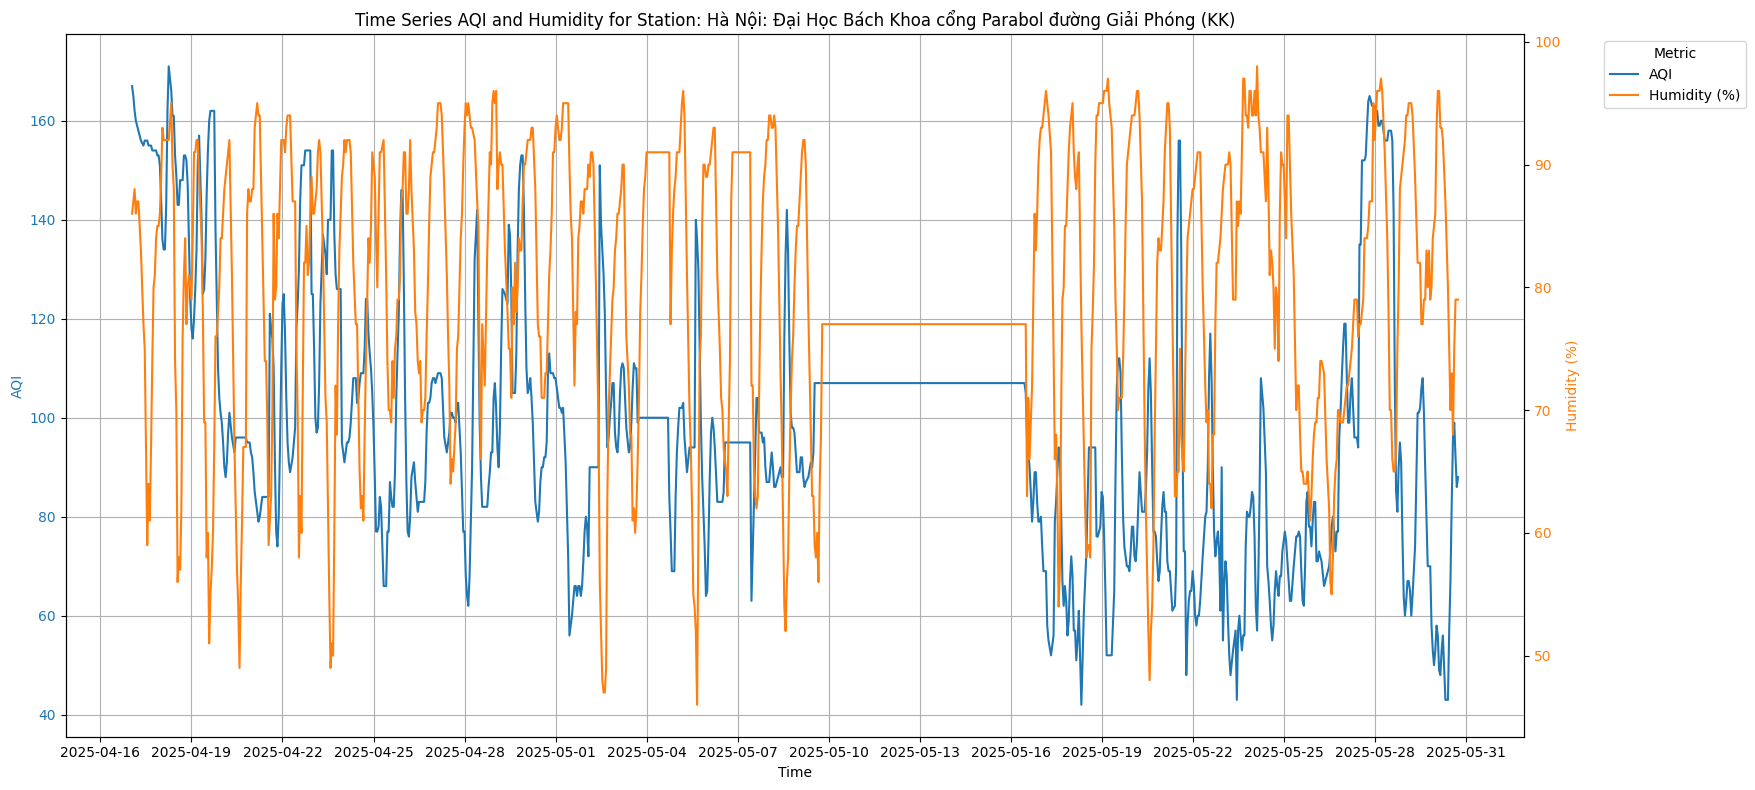

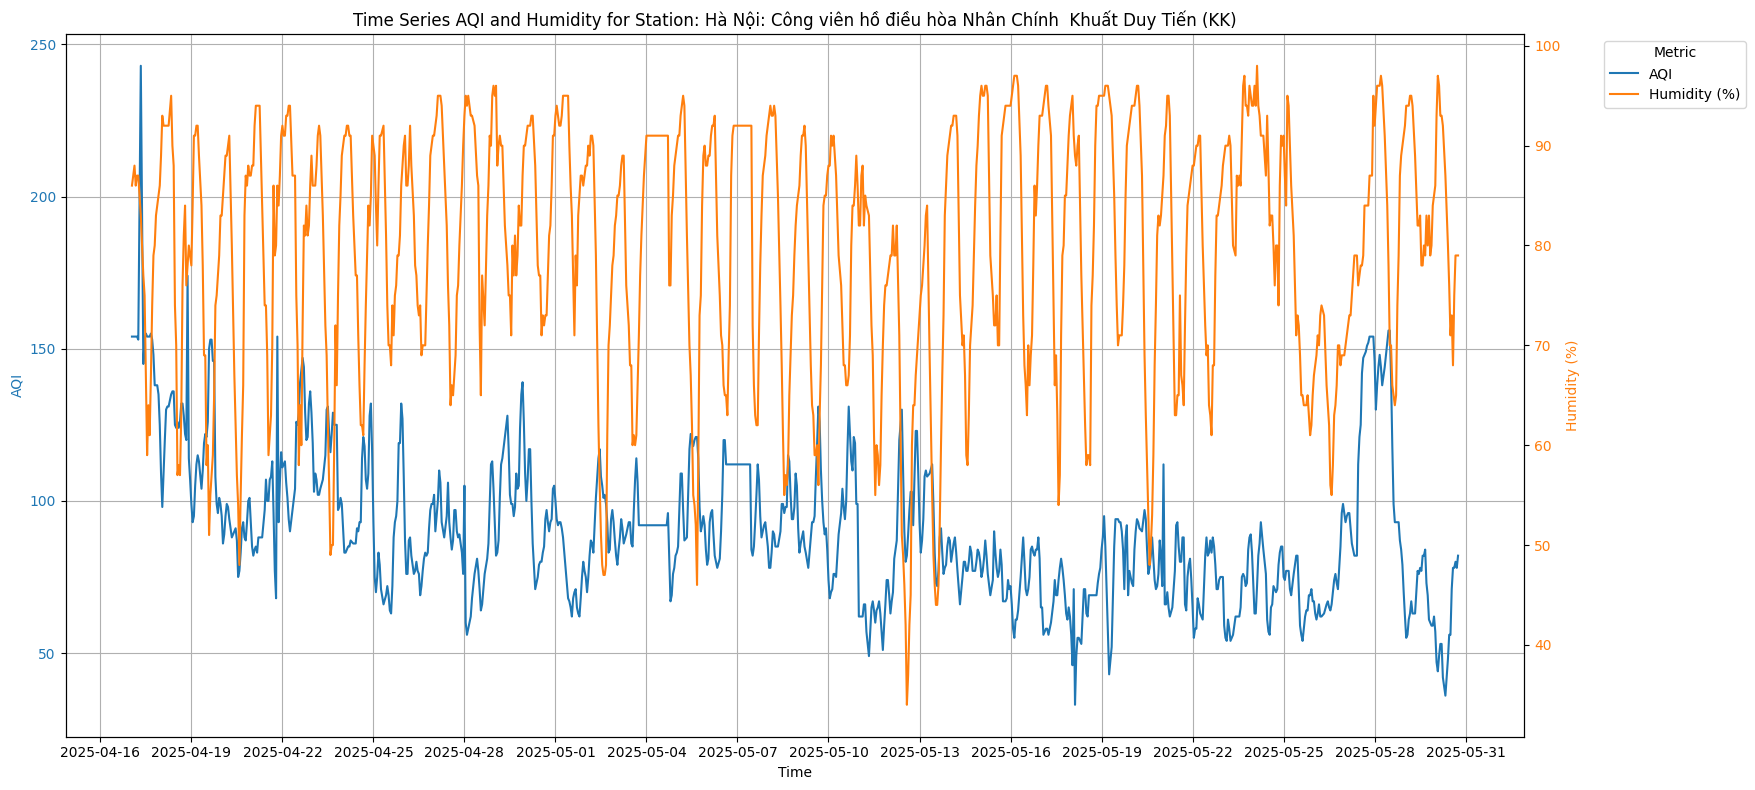

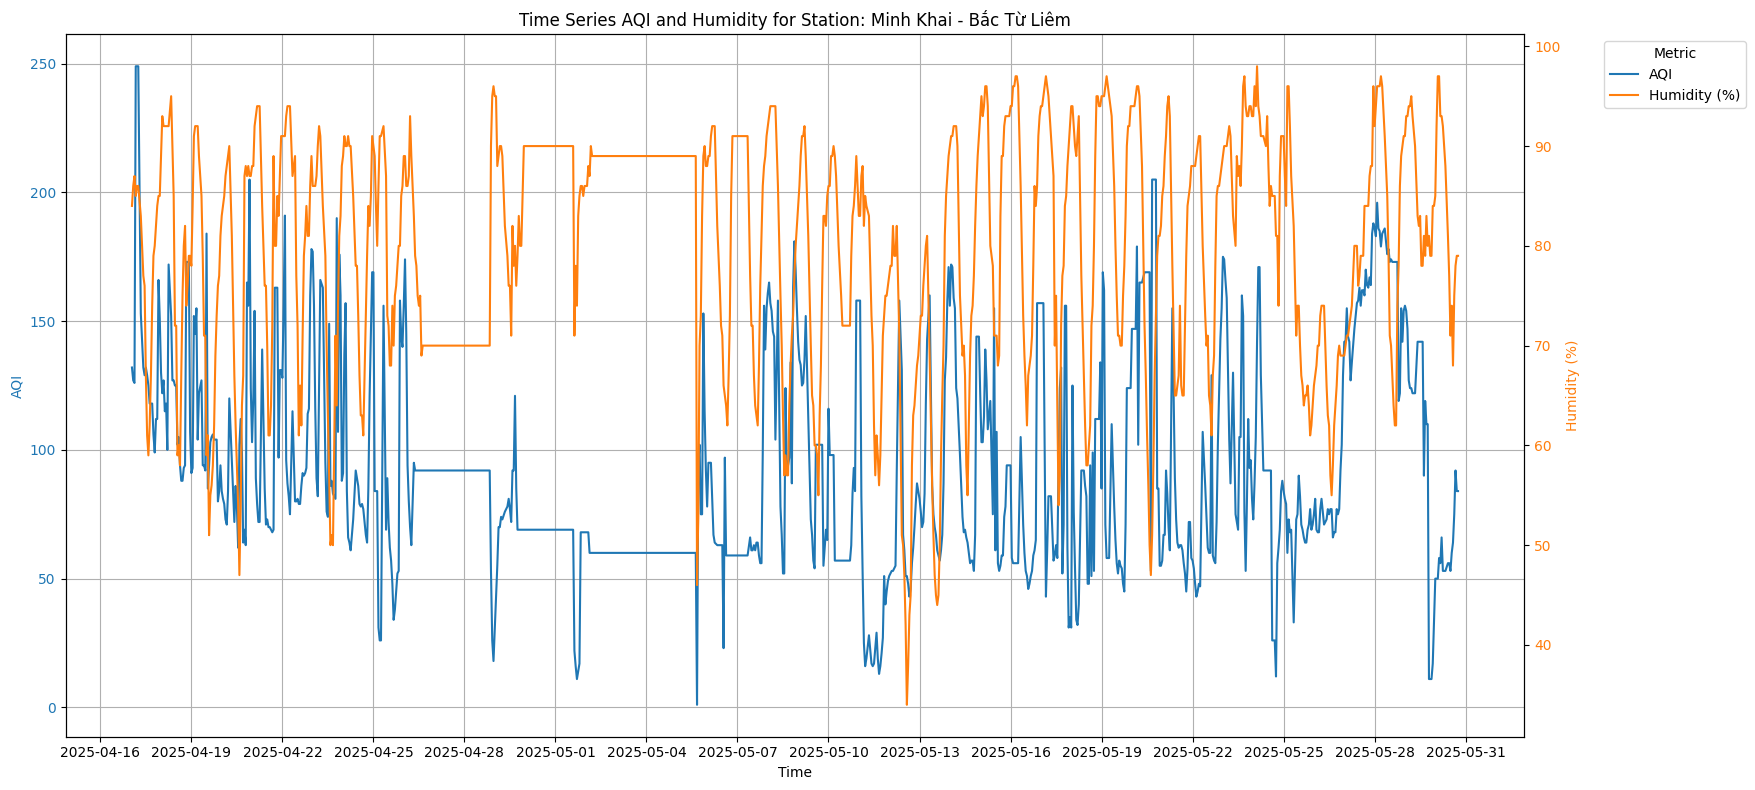

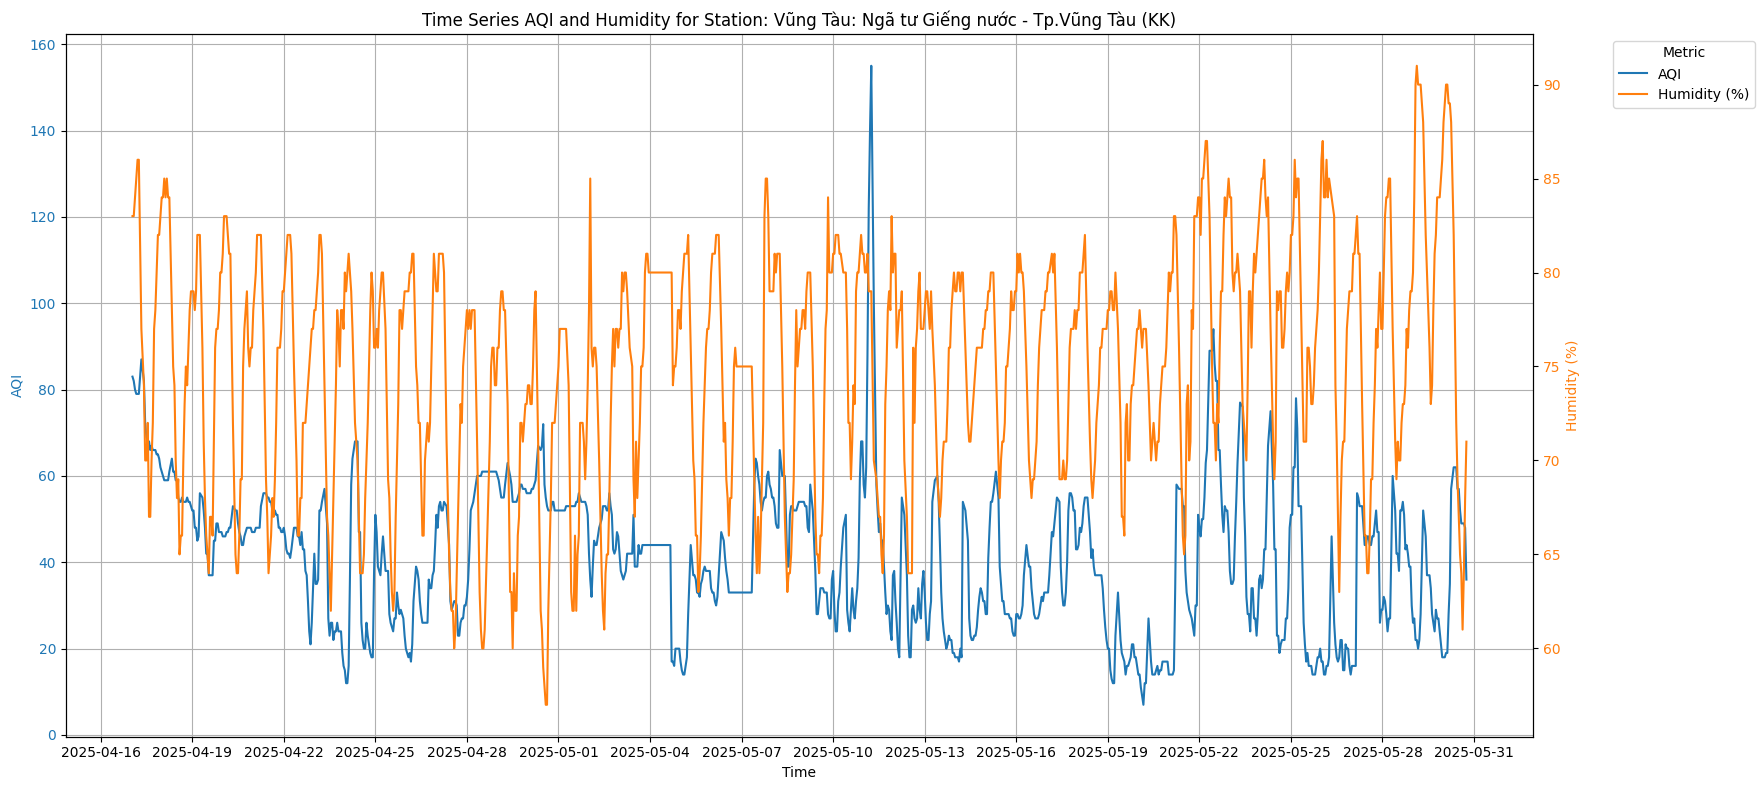

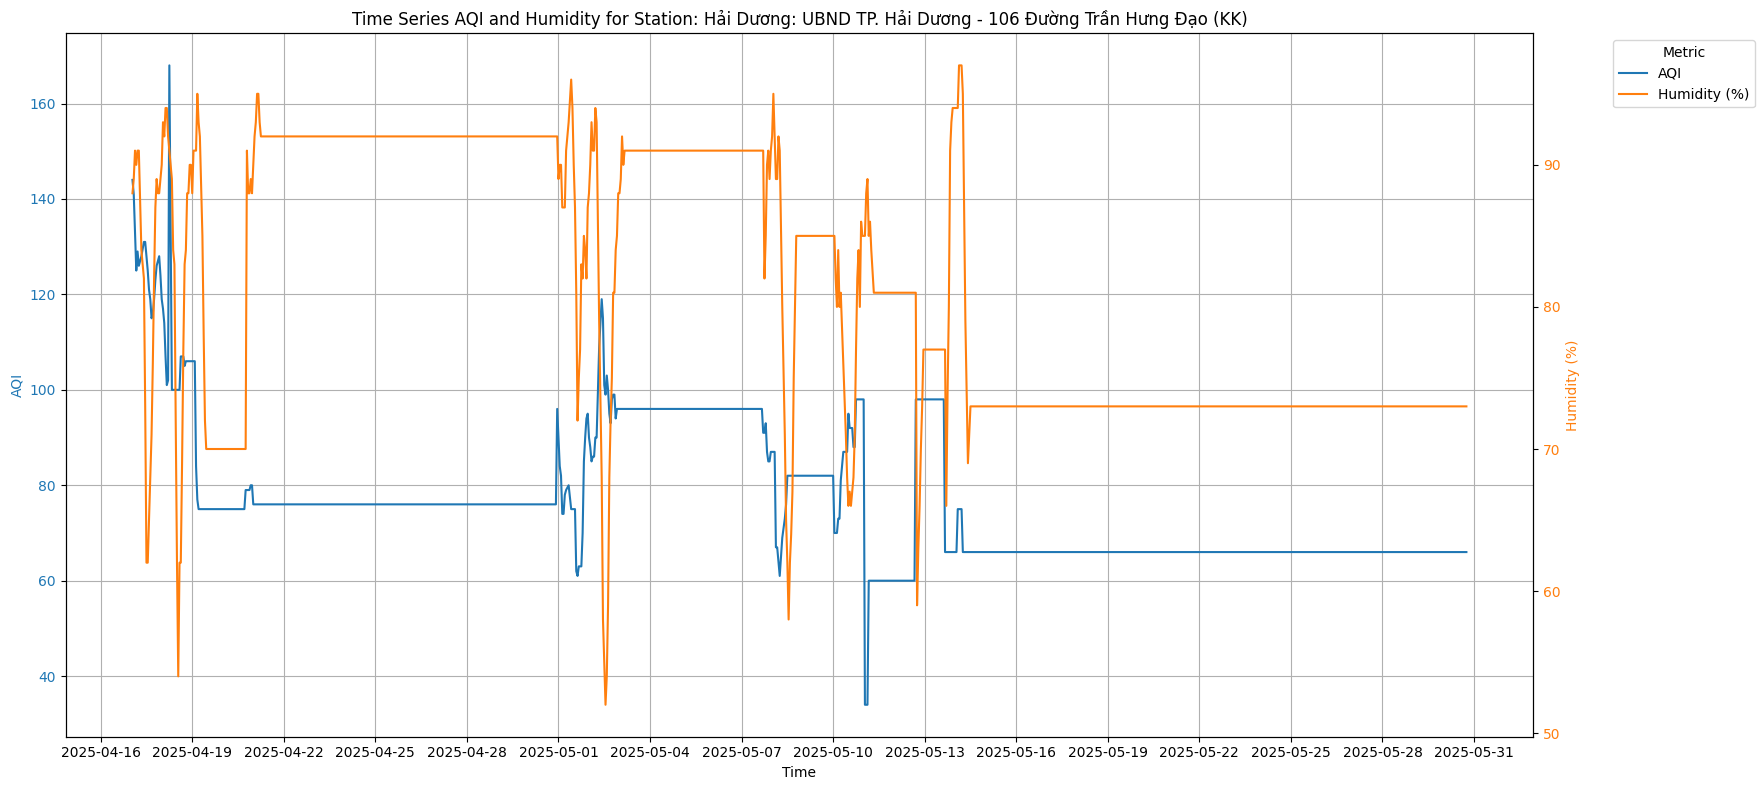

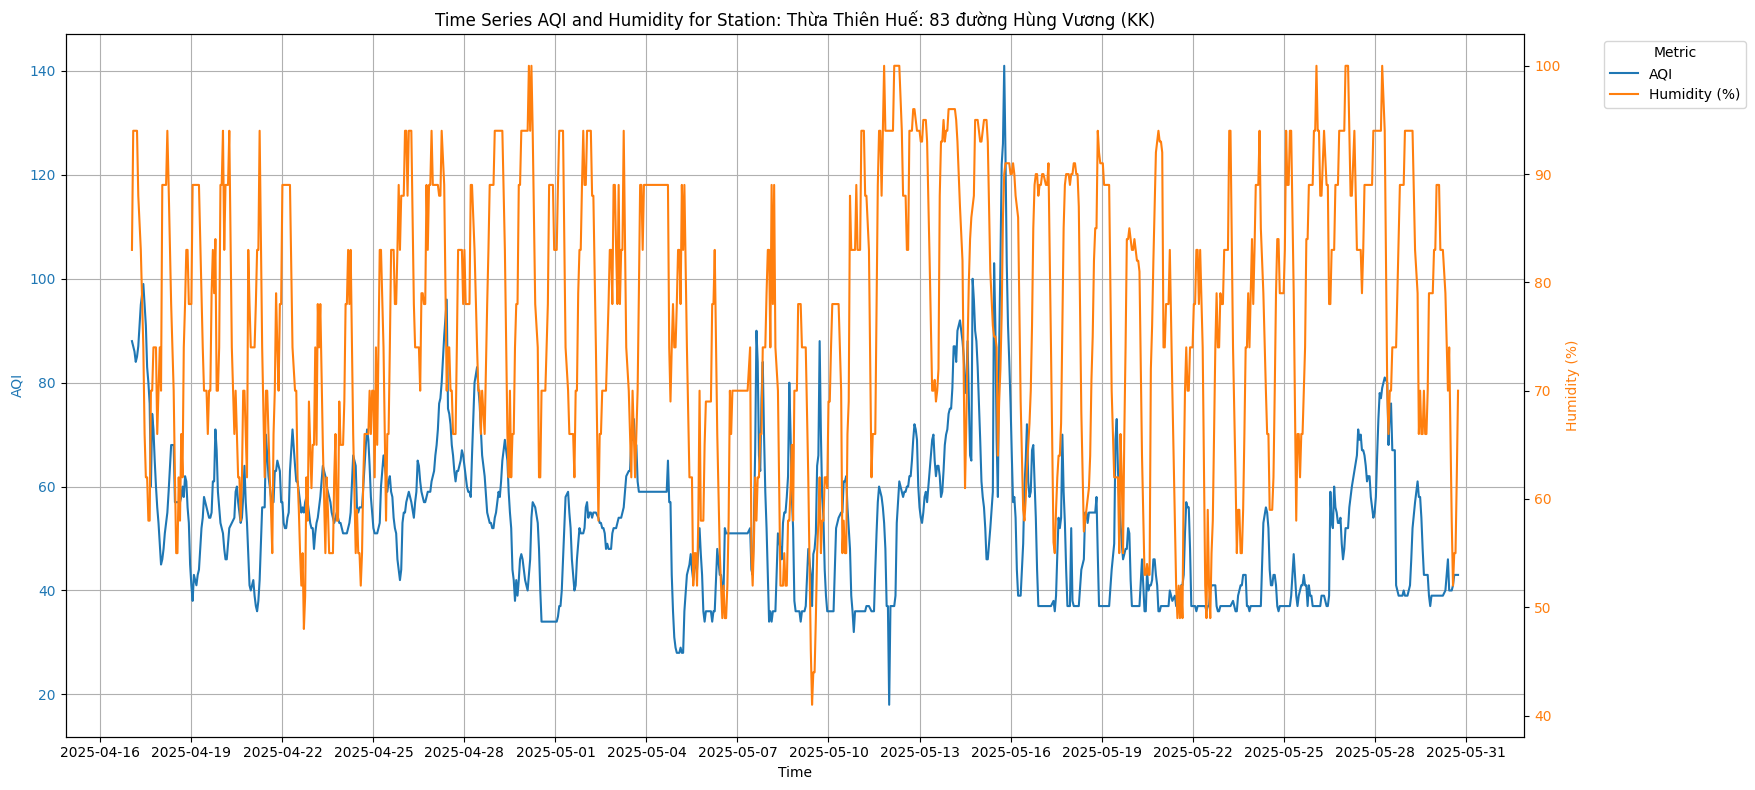

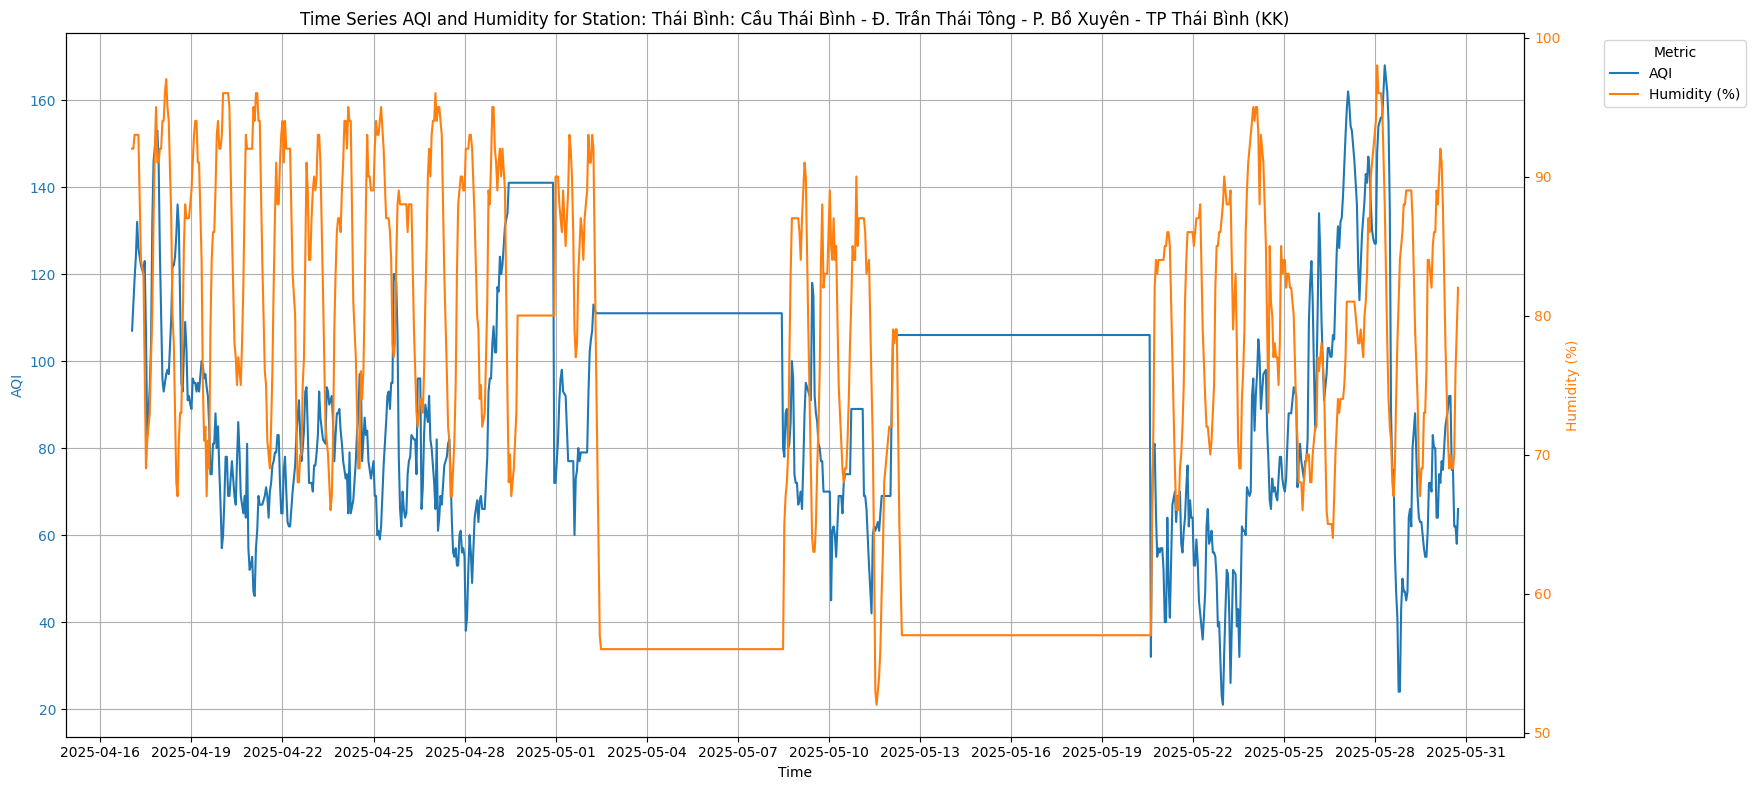

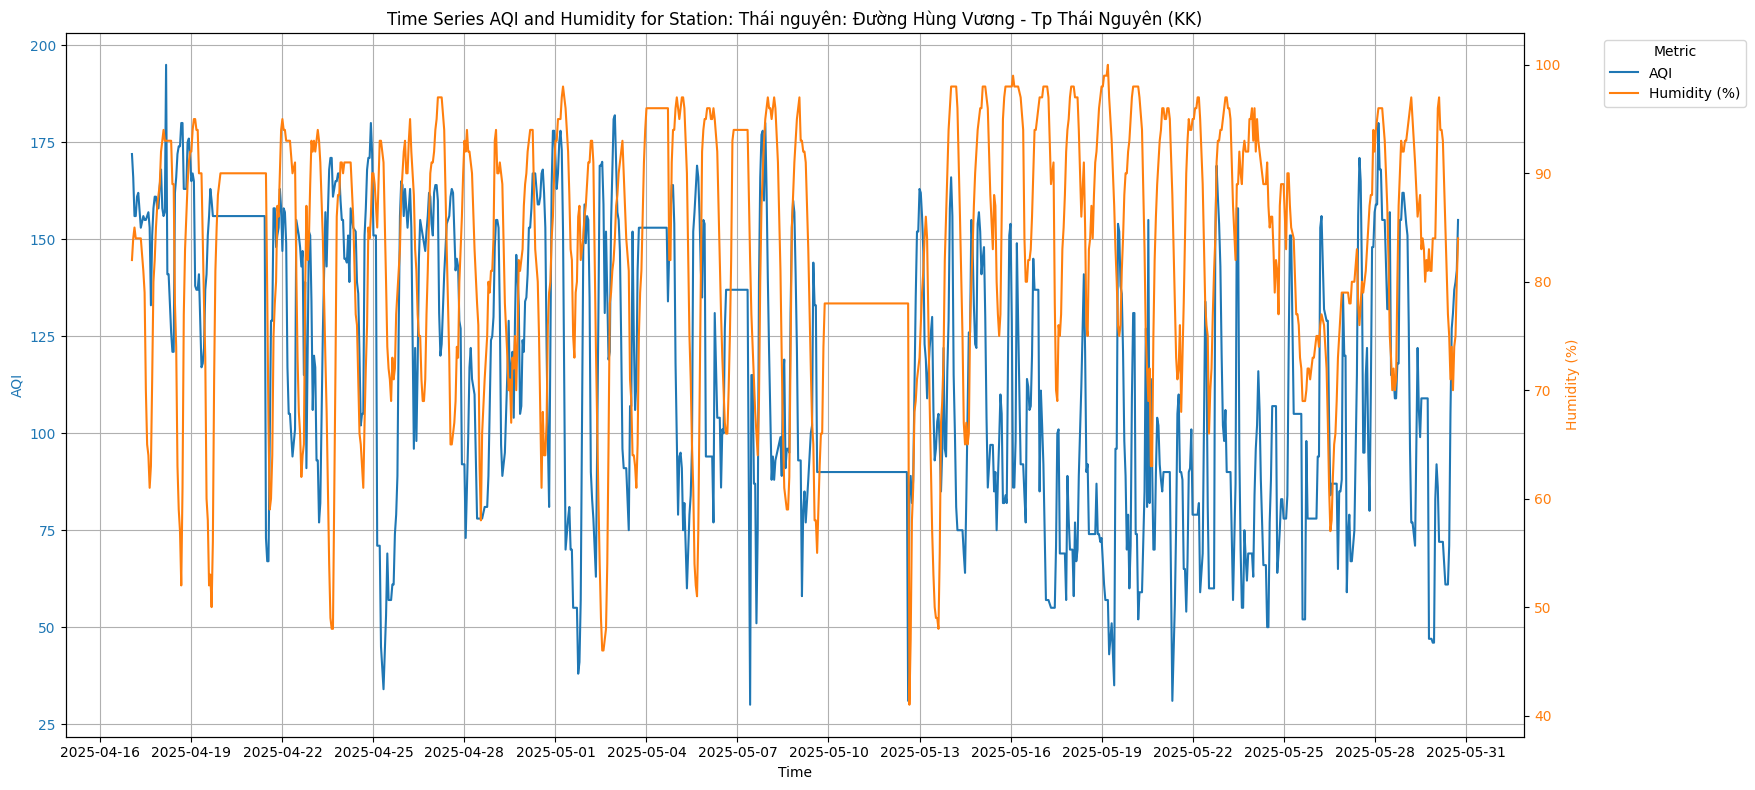

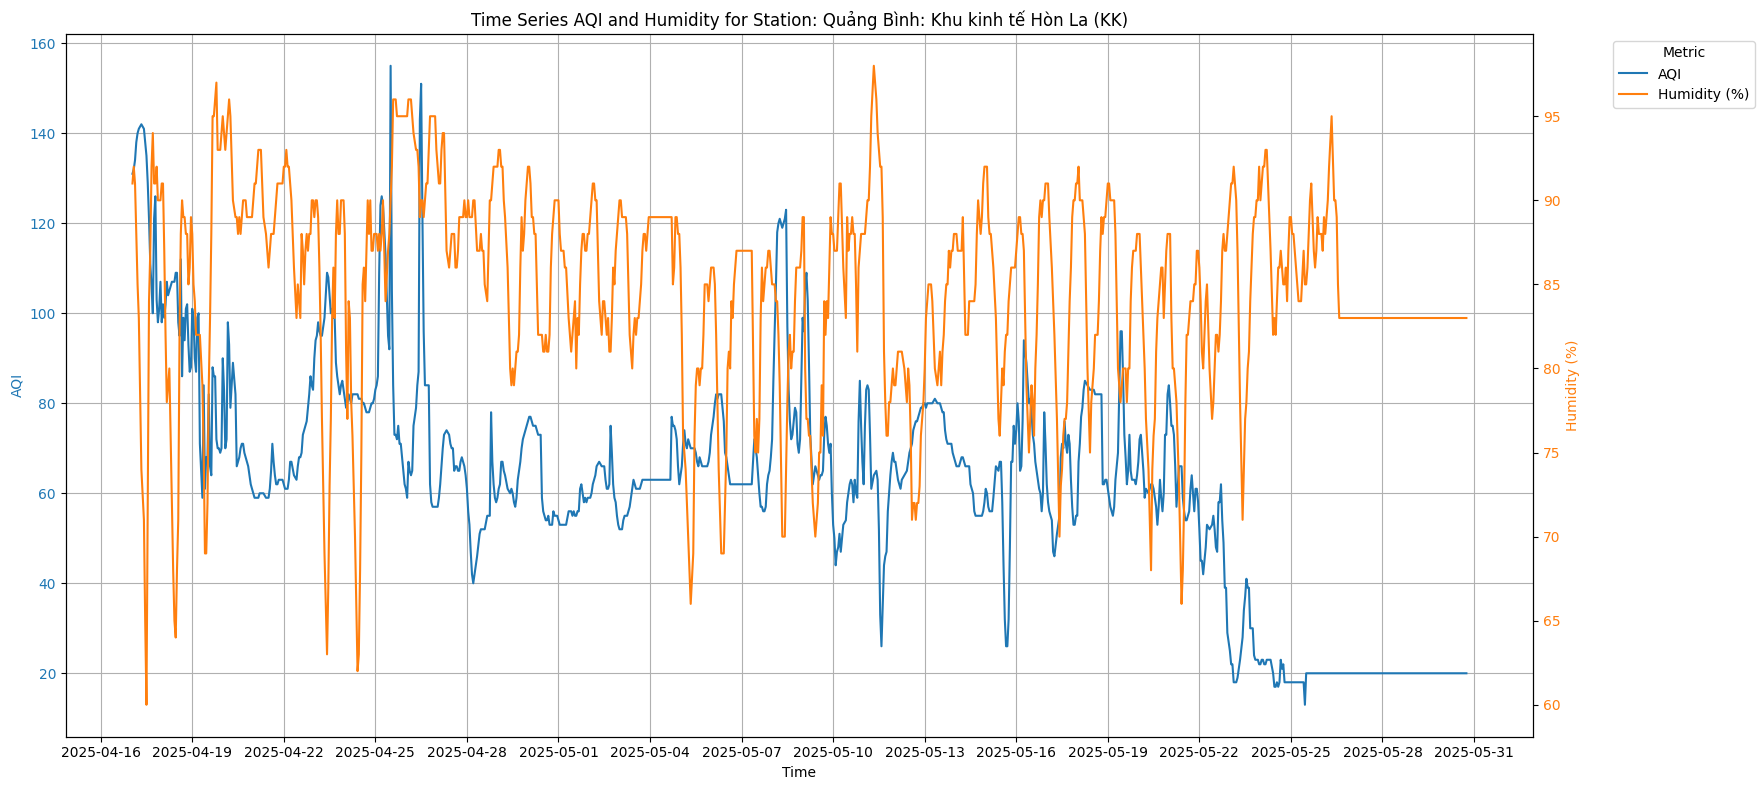

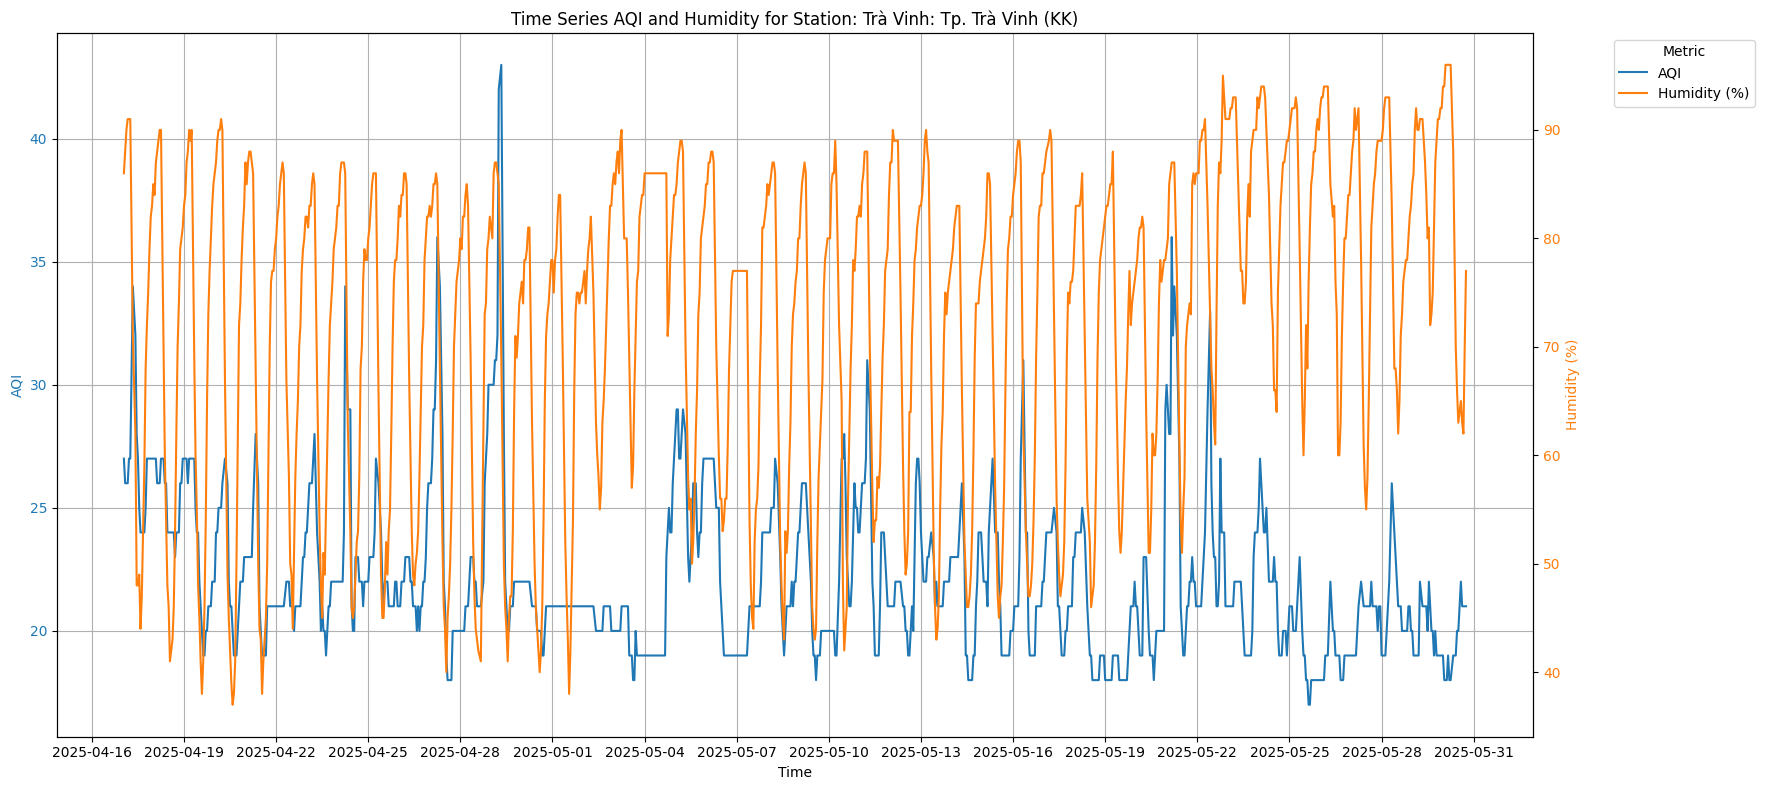

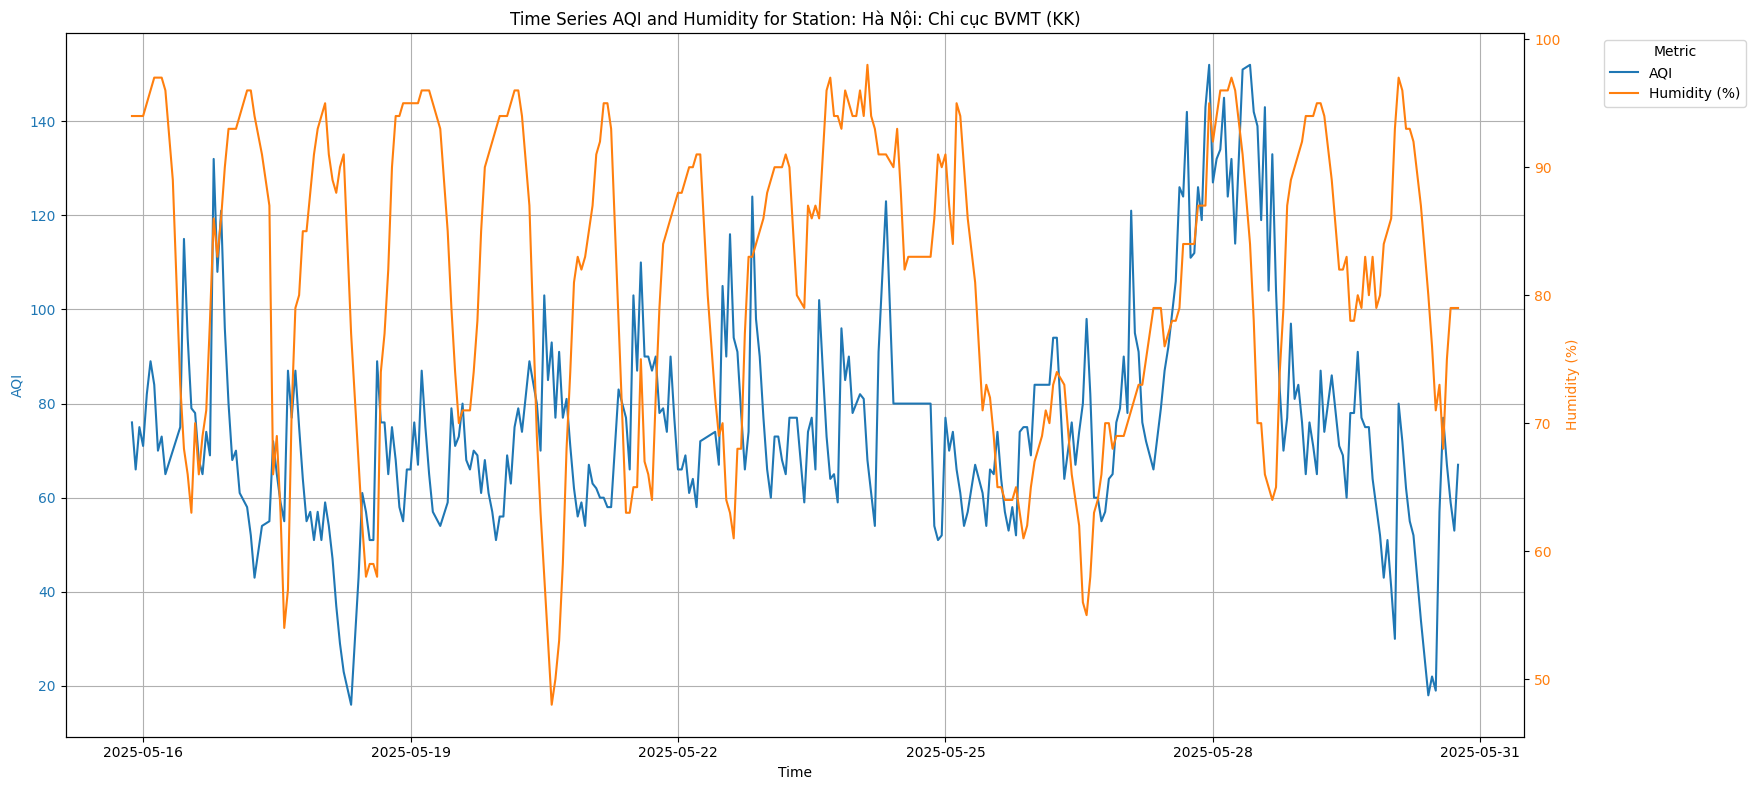

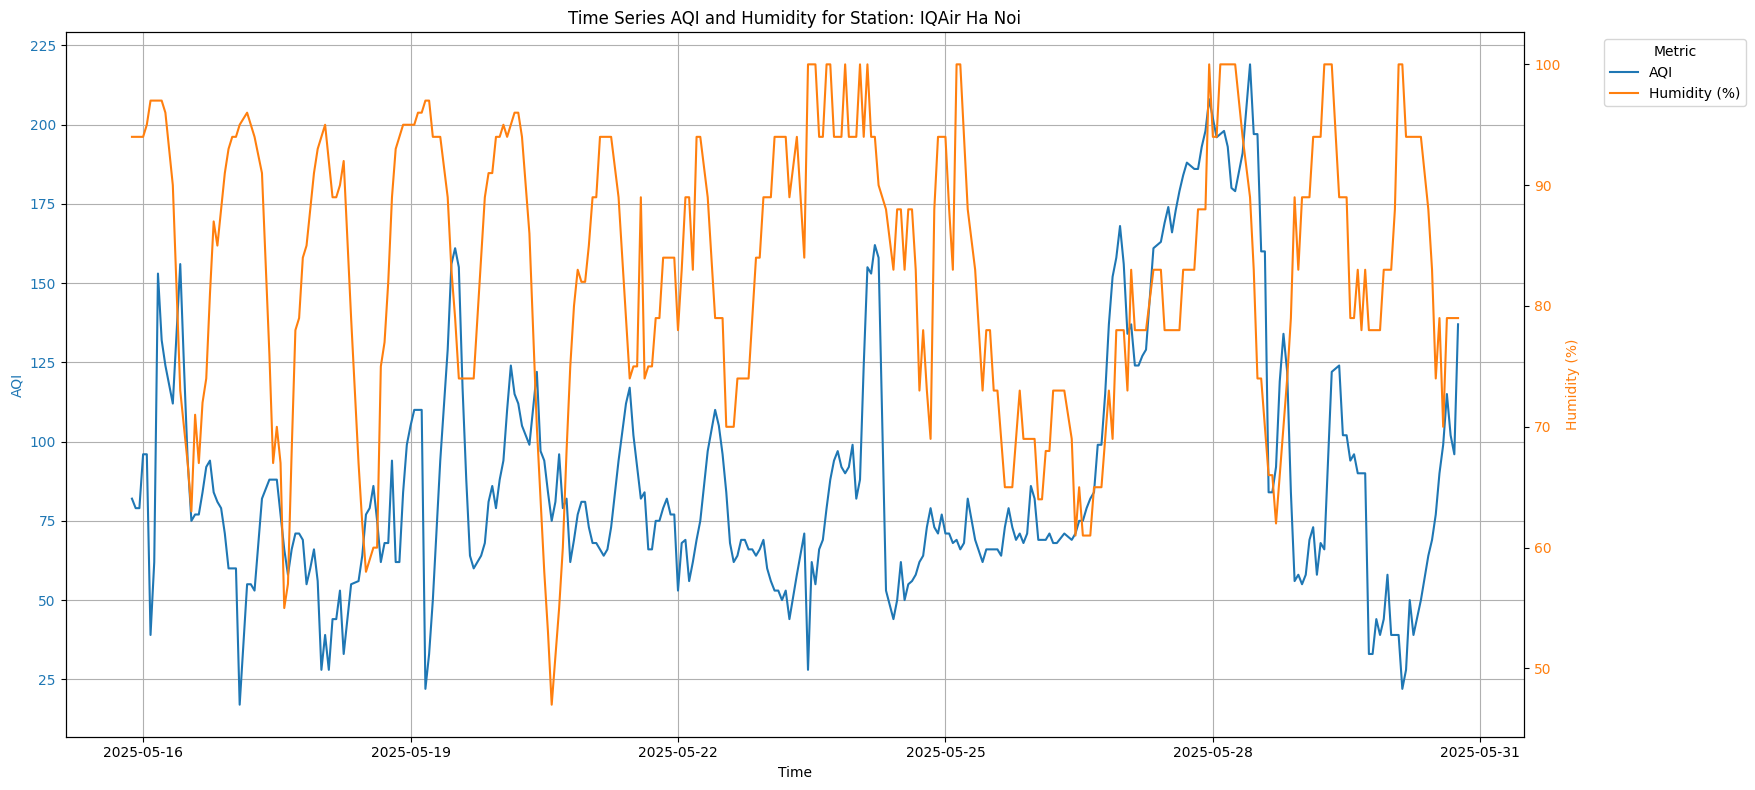

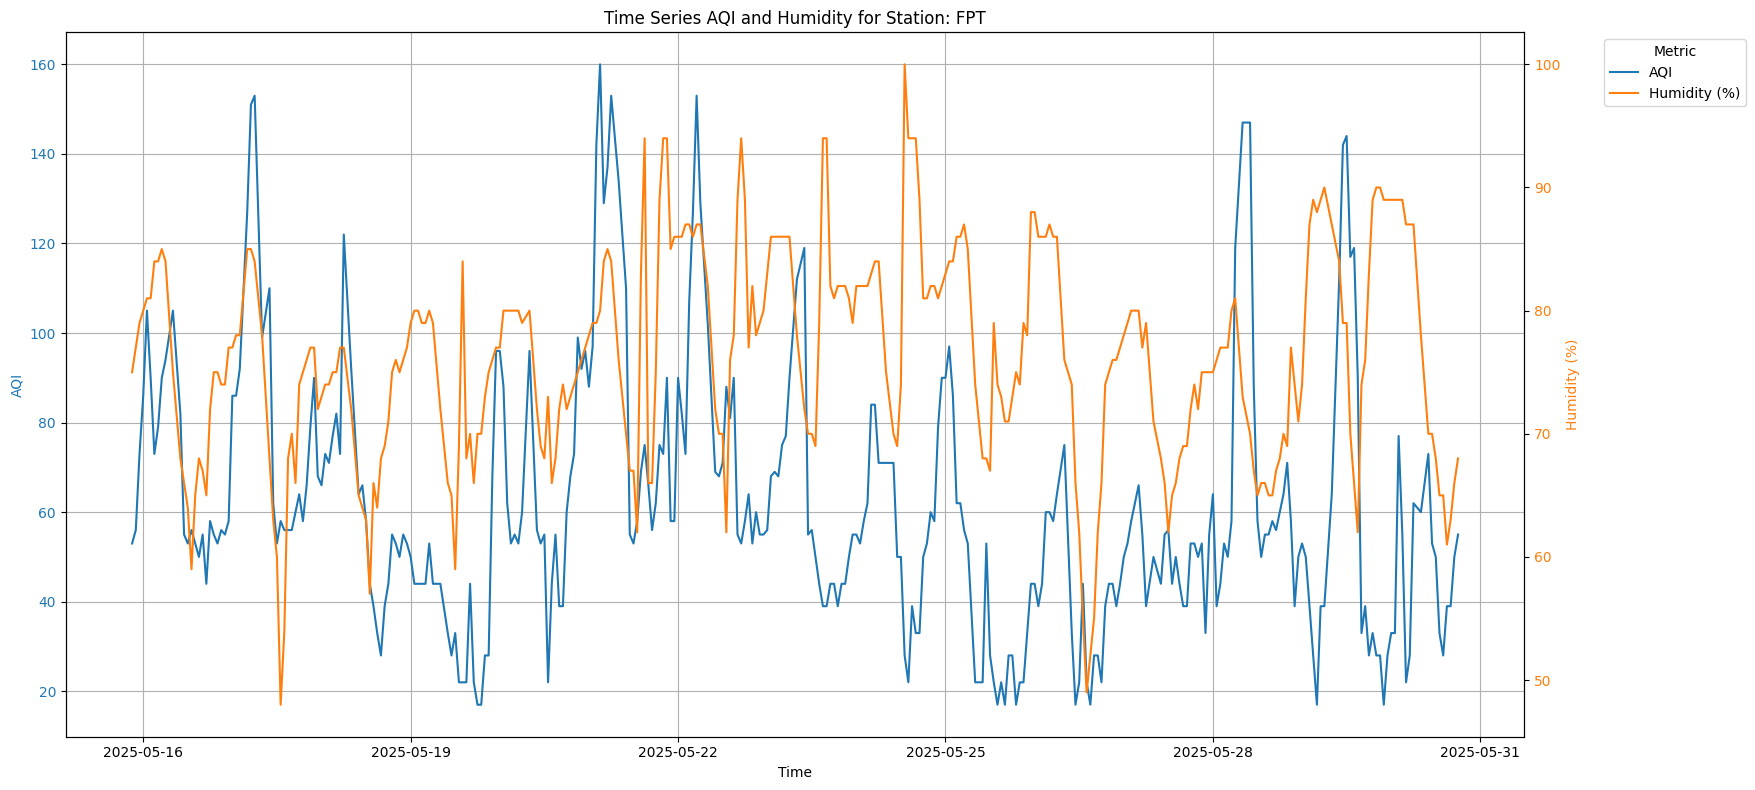

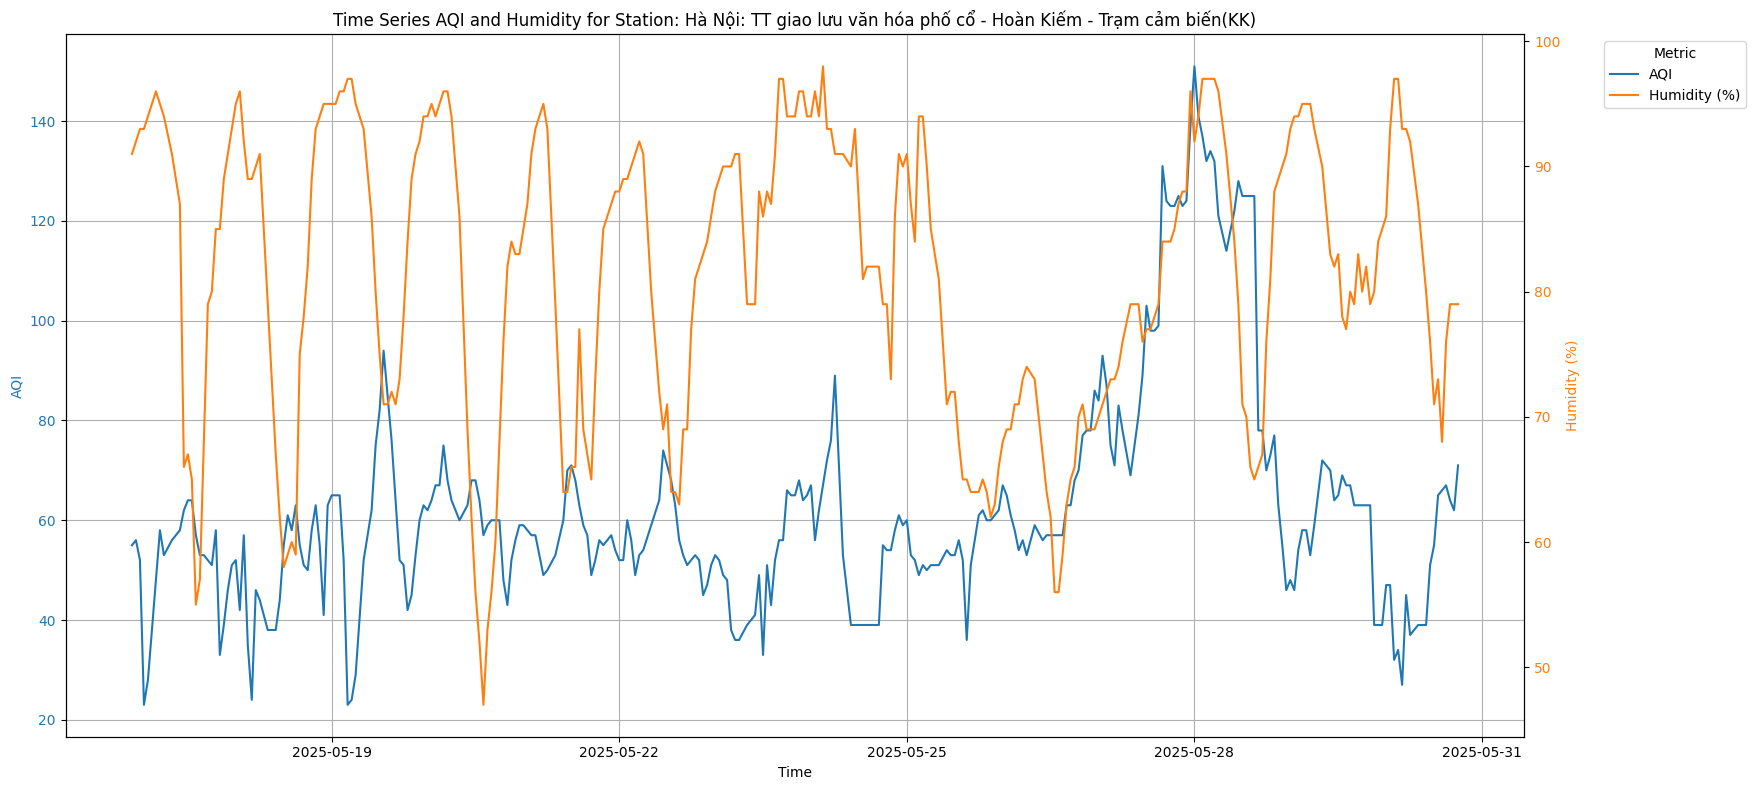

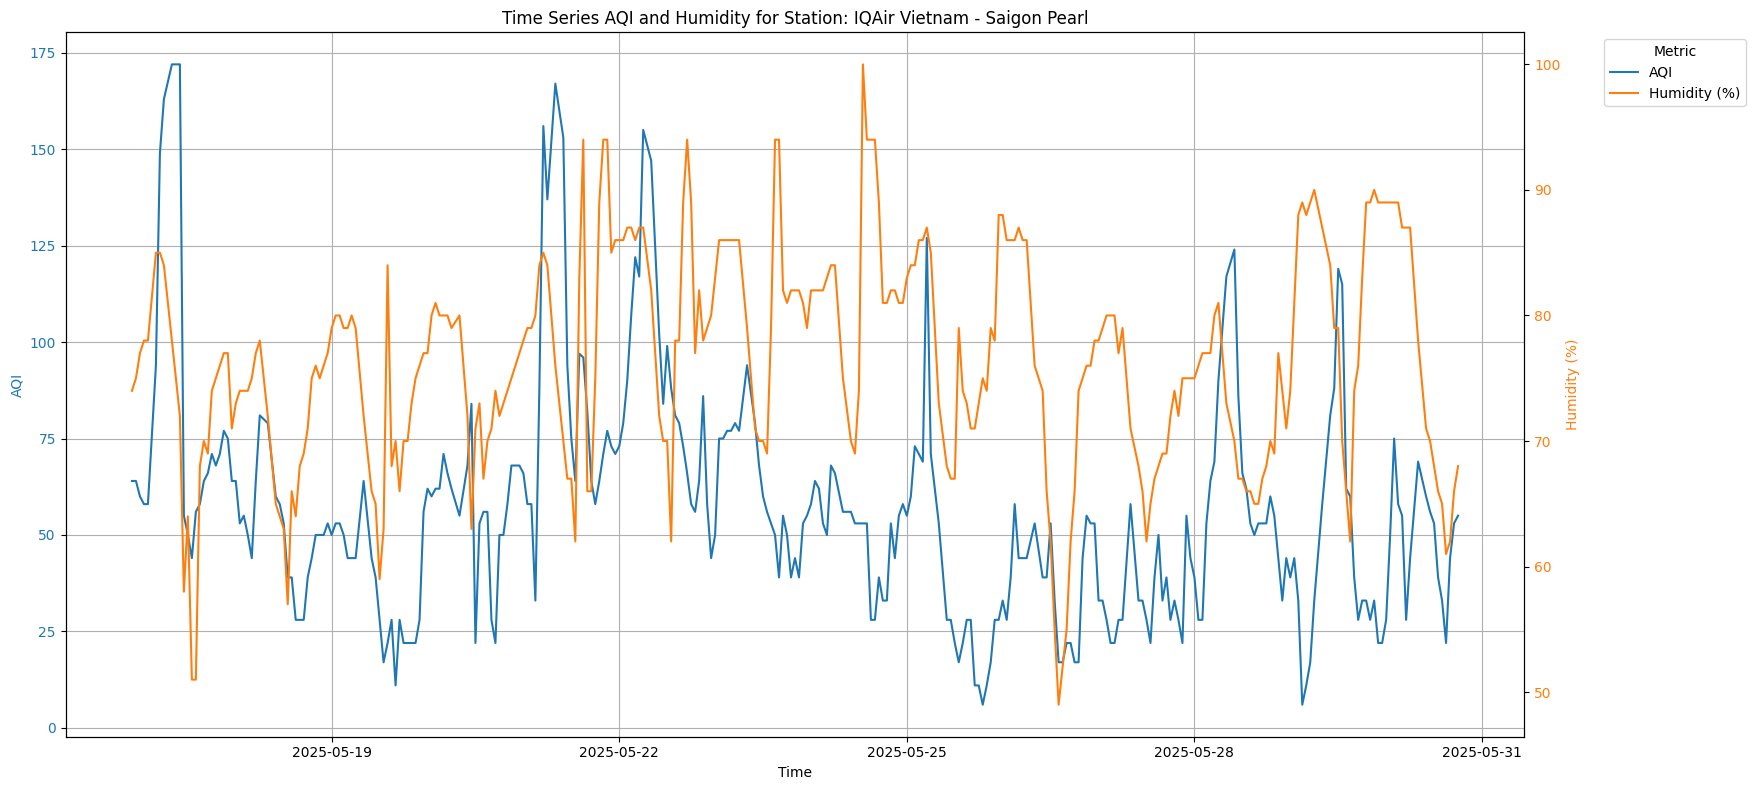

In [4]:
for station in station_names:
    station_df = df[df['station_name'] == station]

    fig, ax1 = plt.subplots(figsize=(16, 8))

    # Plot AQI on primary y-axis
    ax1.set_xlabel('Time')
    ax1.set_ylabel('AQI', color='tab:blue')
    ax1.plot(station_df['timestamp'], station_df['aqi'], label='AQI', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create secondary y-axis for humidity
    ax2 = ax1.twinx()
    ax2.set_ylabel('Humidity (%)', color='tab:orange')
    ax2.plot(station_df['timestamp'], station_df['humidity (%)'], label='Humidity (%)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Format x-axis ticks
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    # Title and layout
    plt.title(f'Time Series AQI and Humidity for Station: {station}')
    fig.tight_layout()
    ax1.grid(True)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

AQI/PM2.5 plot


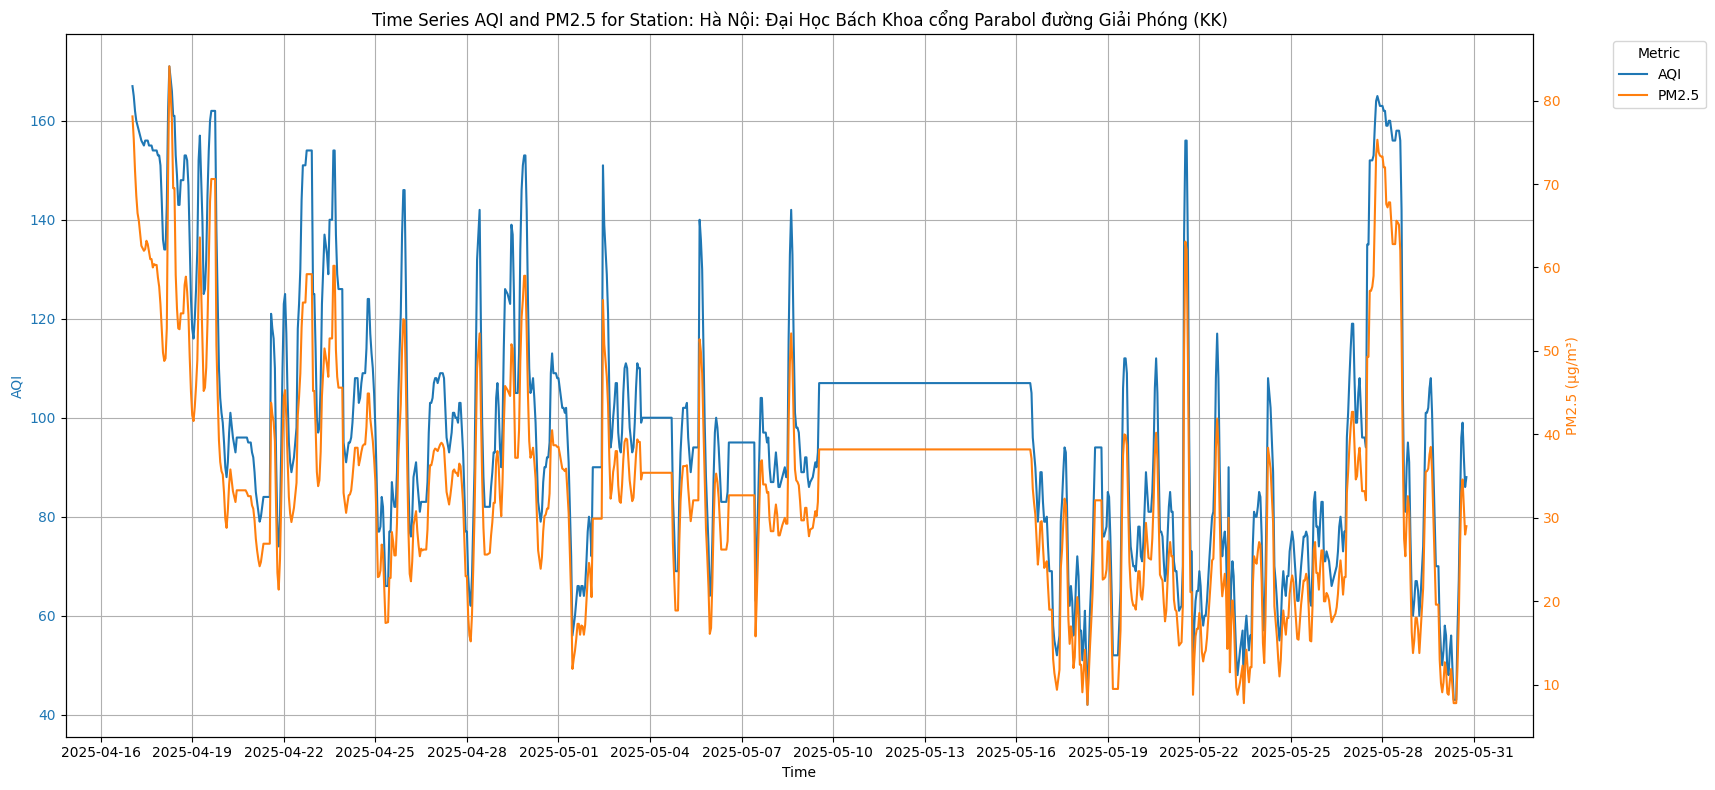

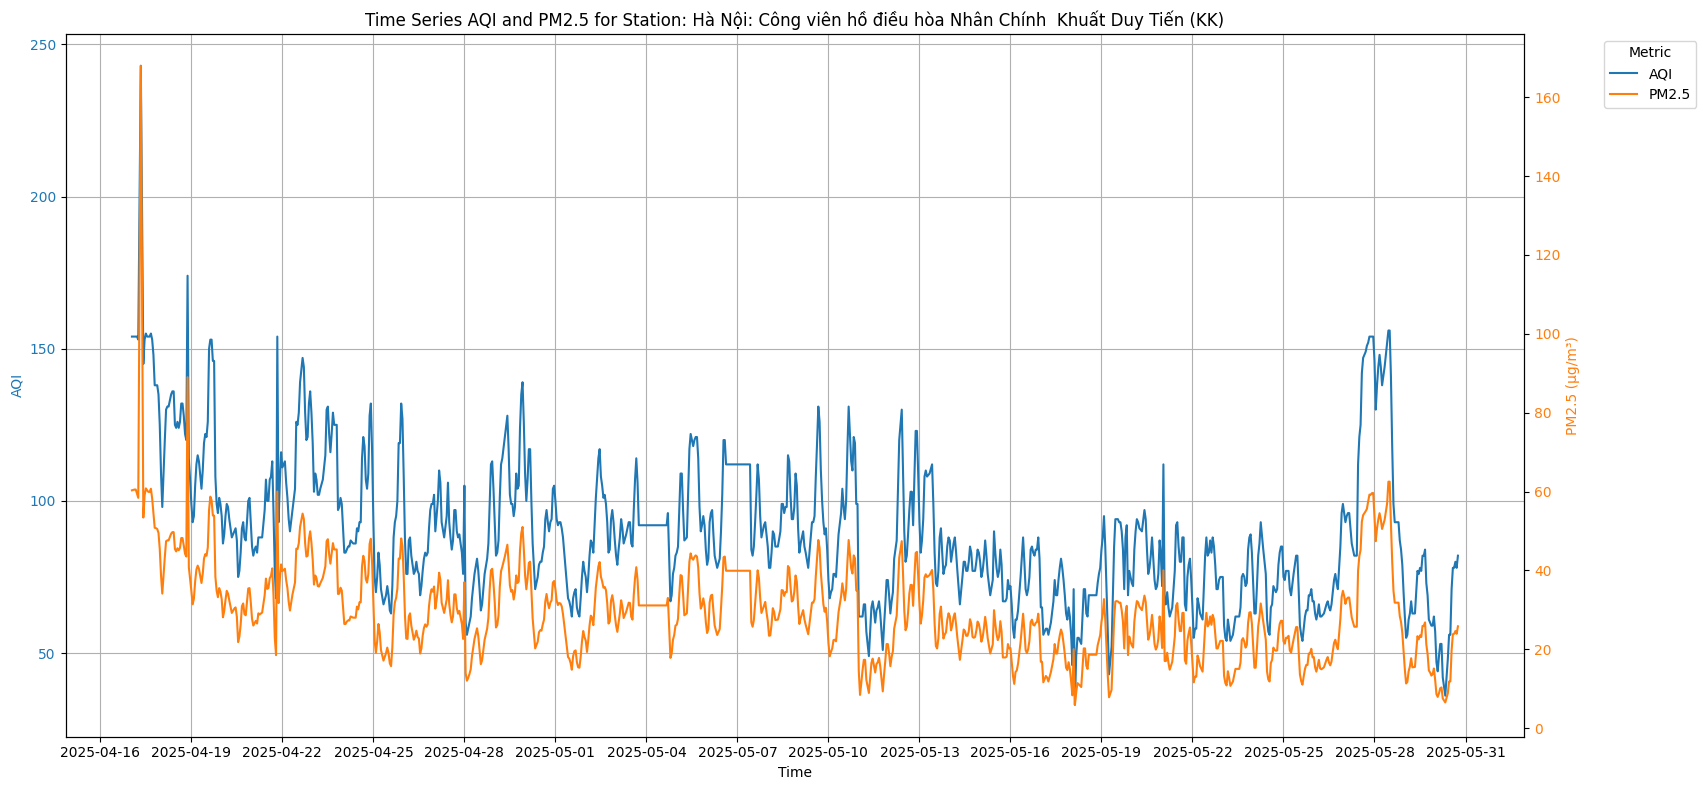

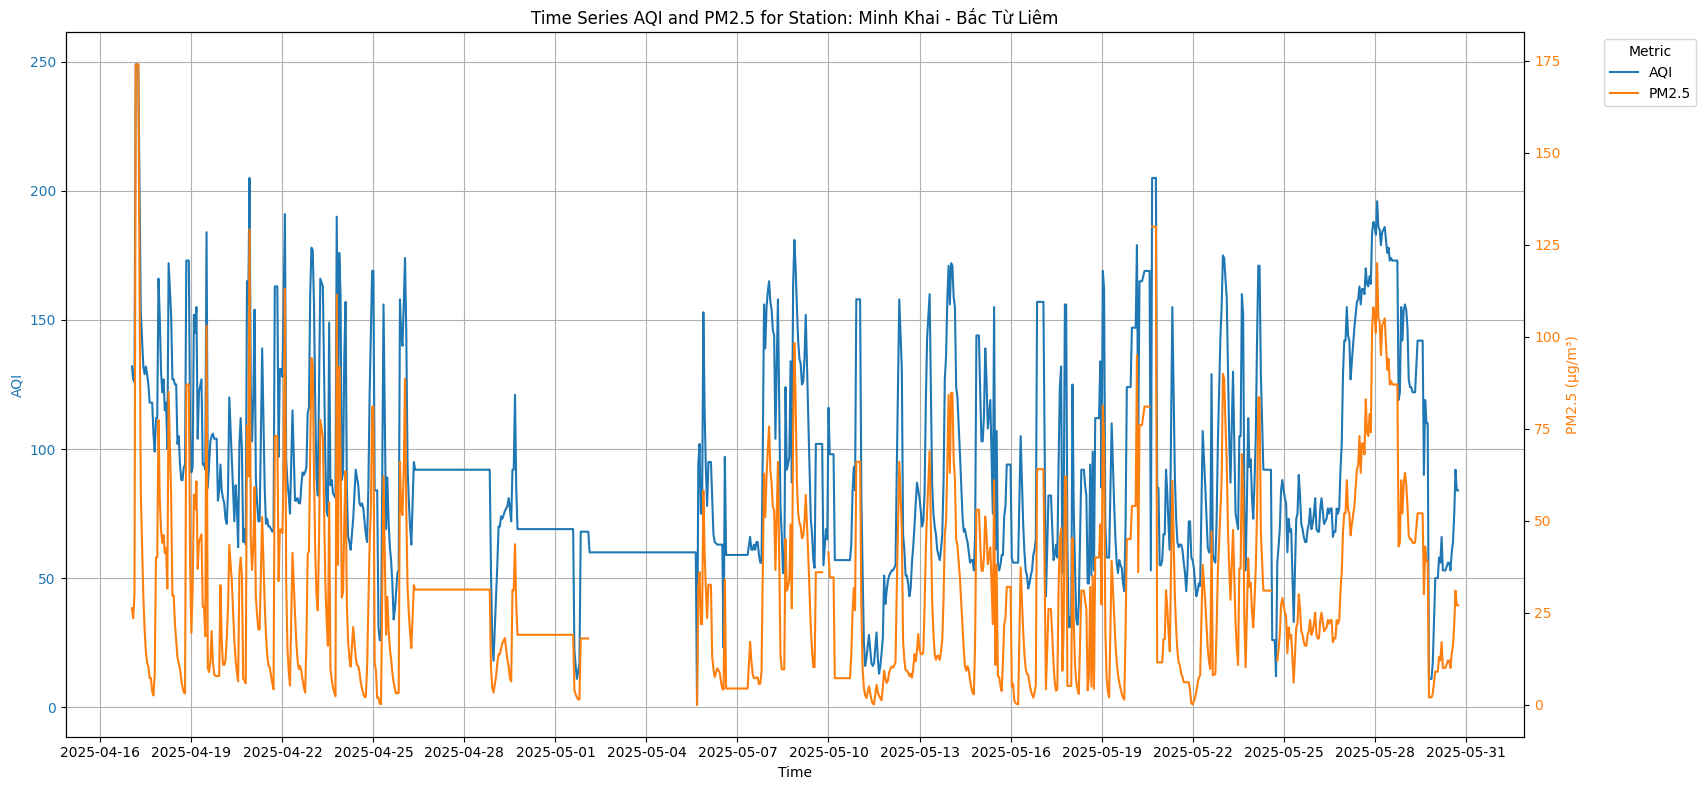

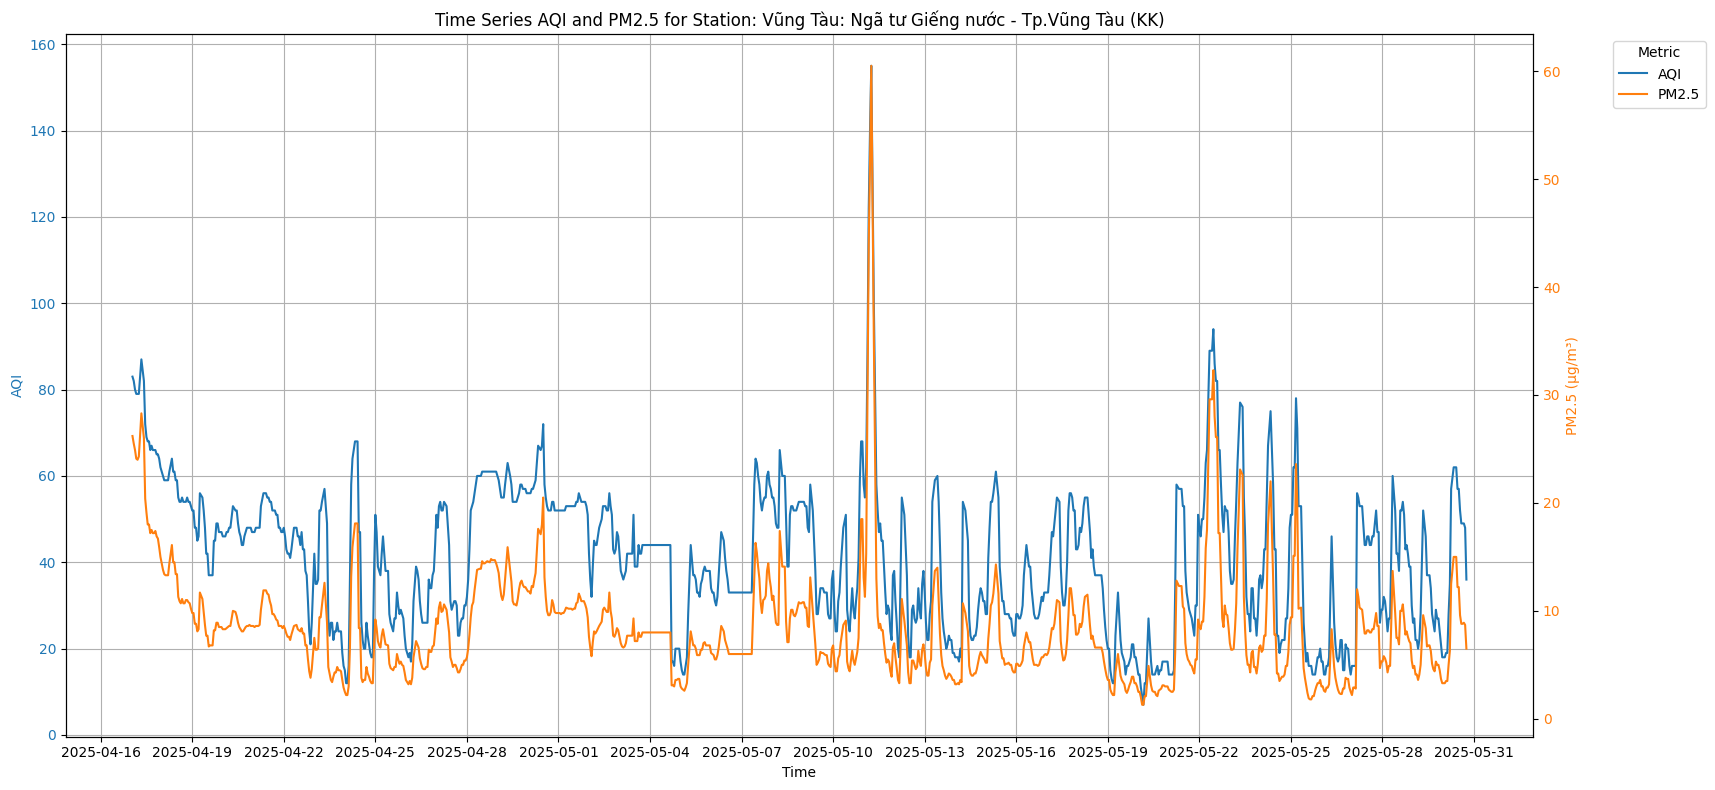

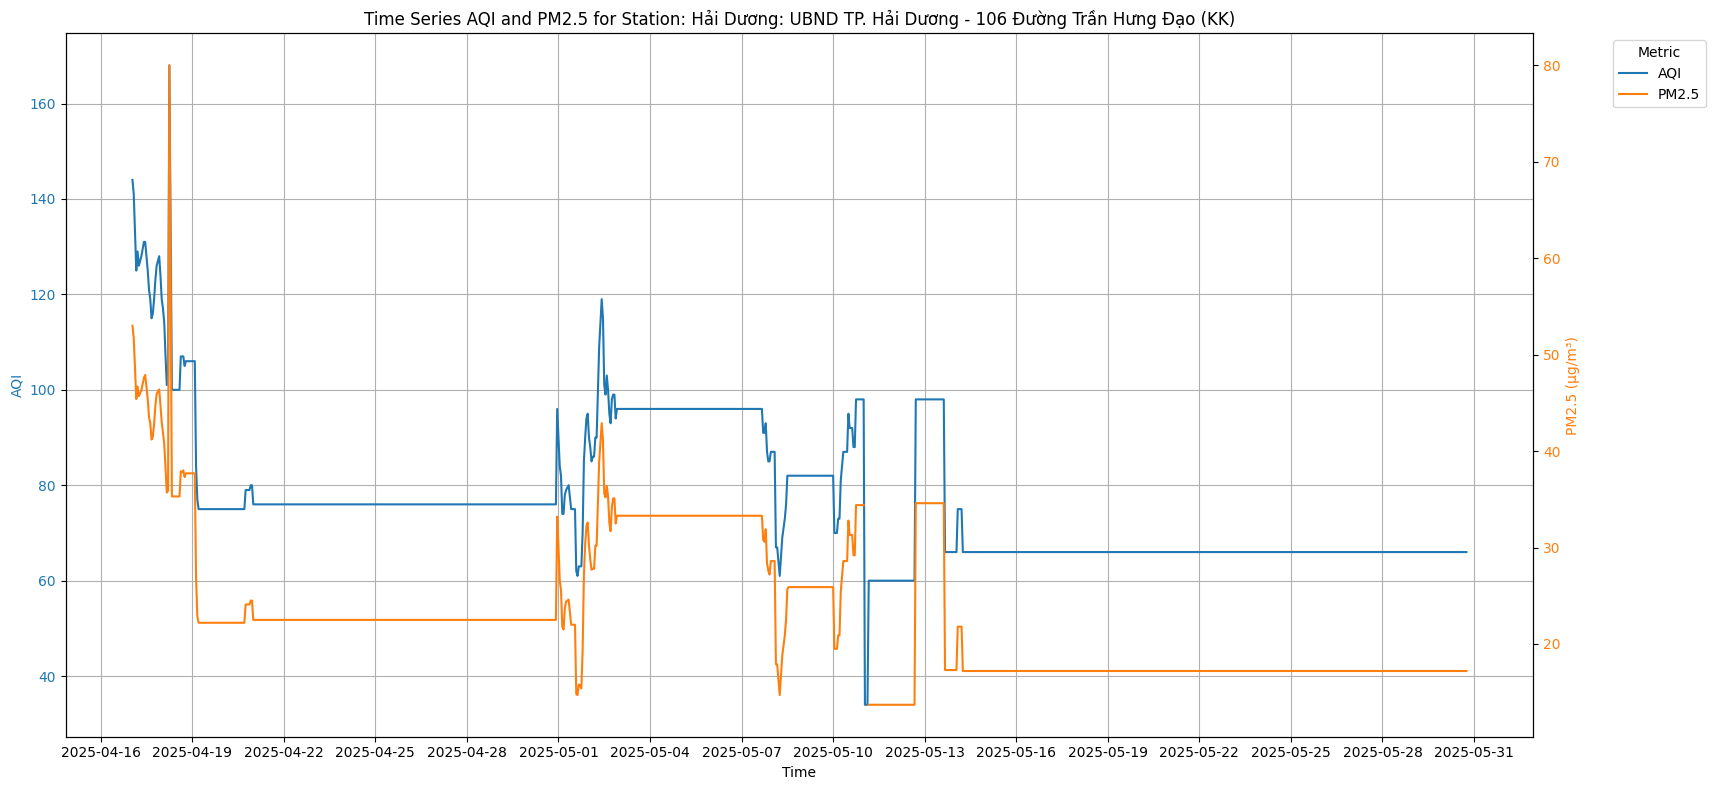

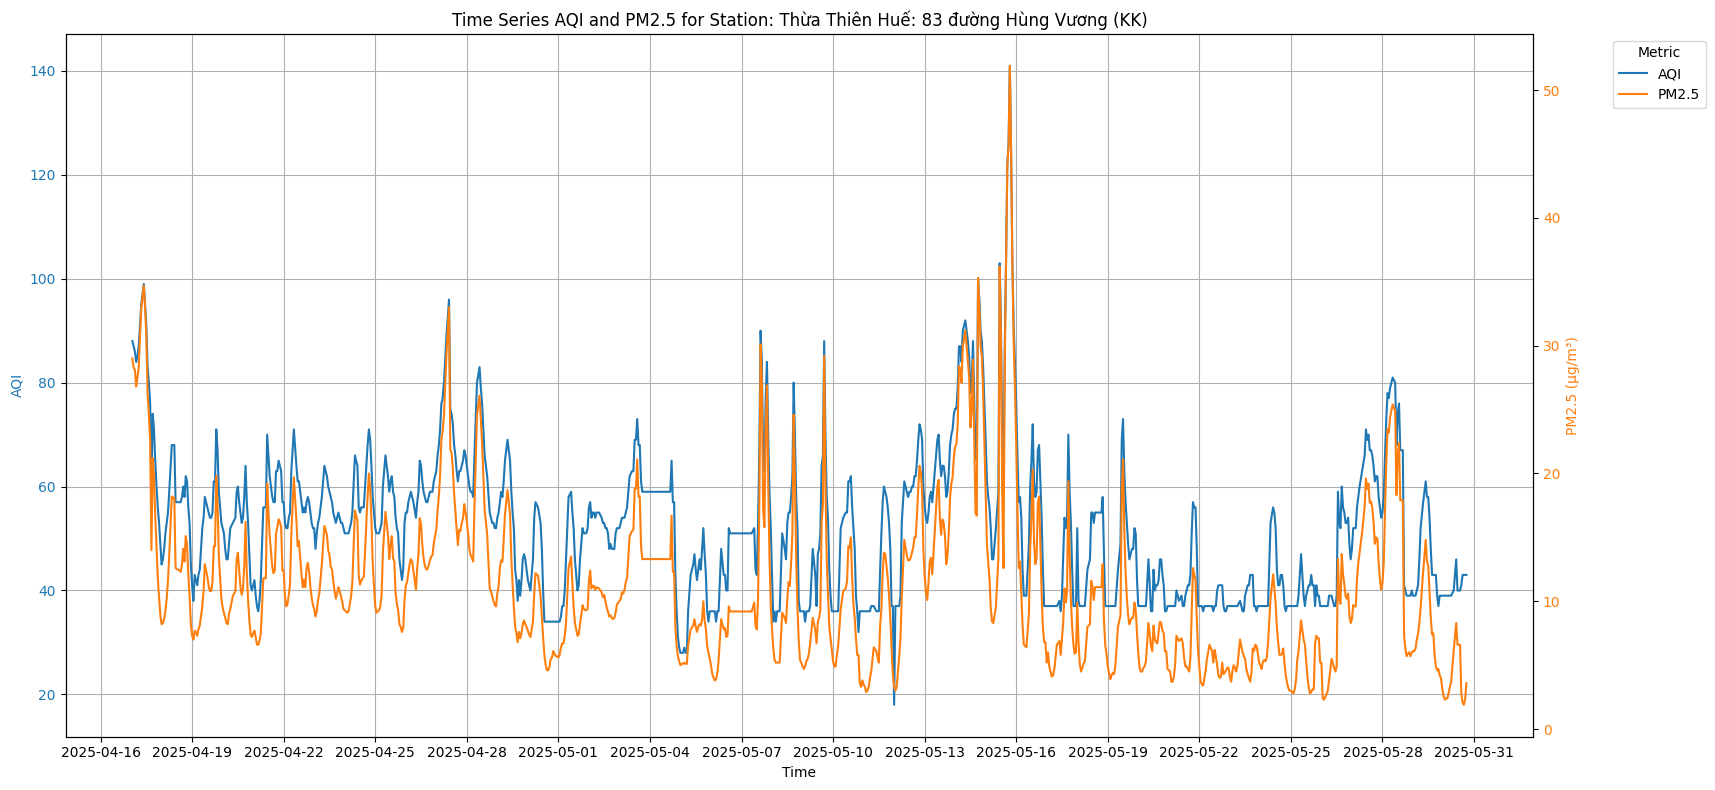

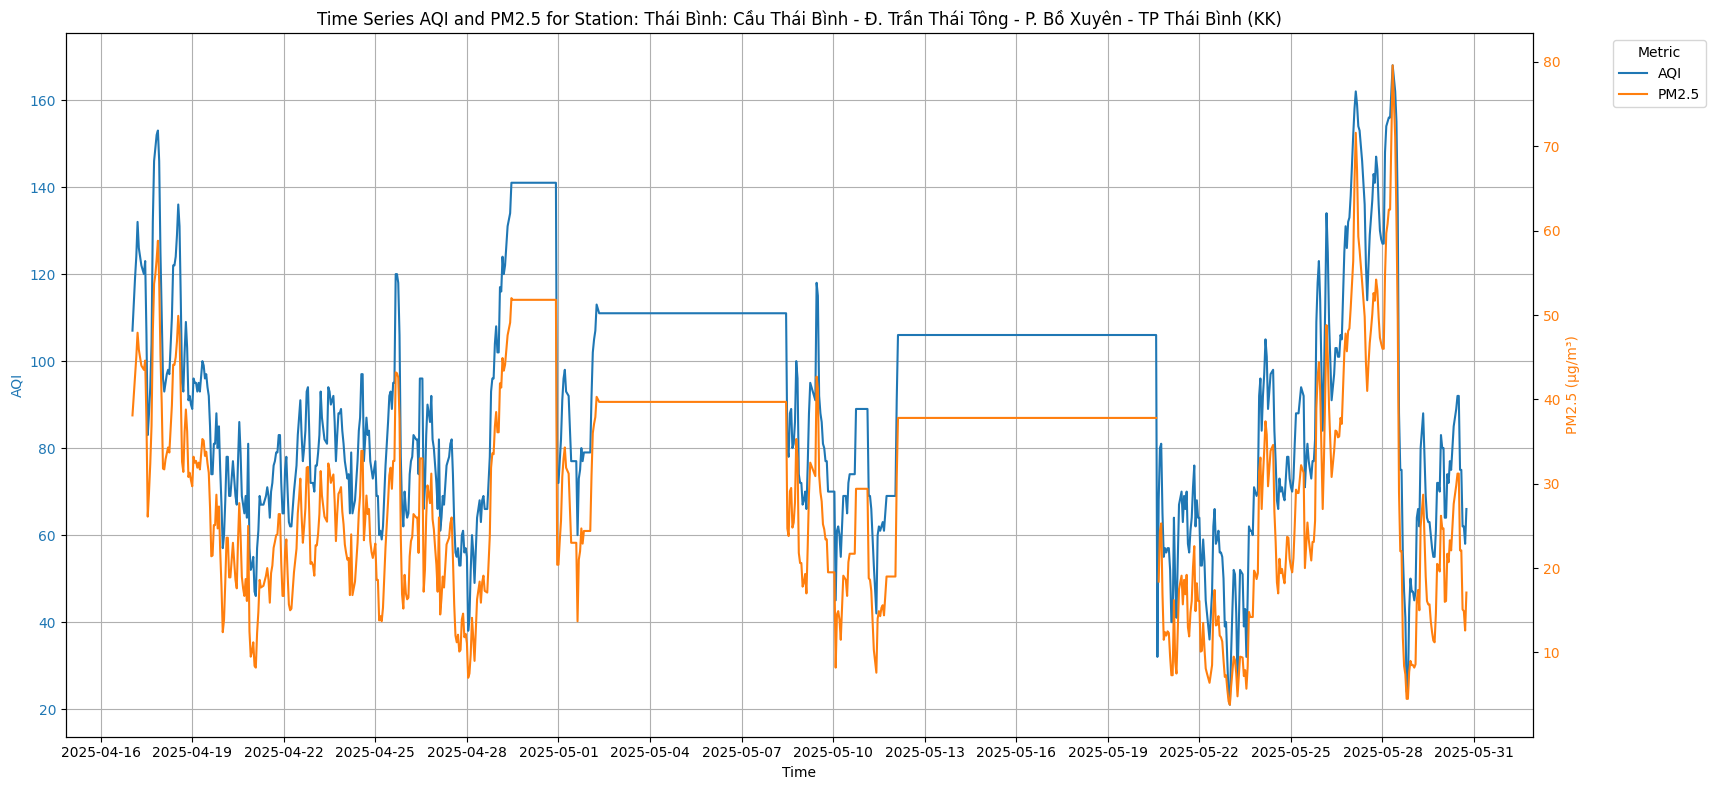

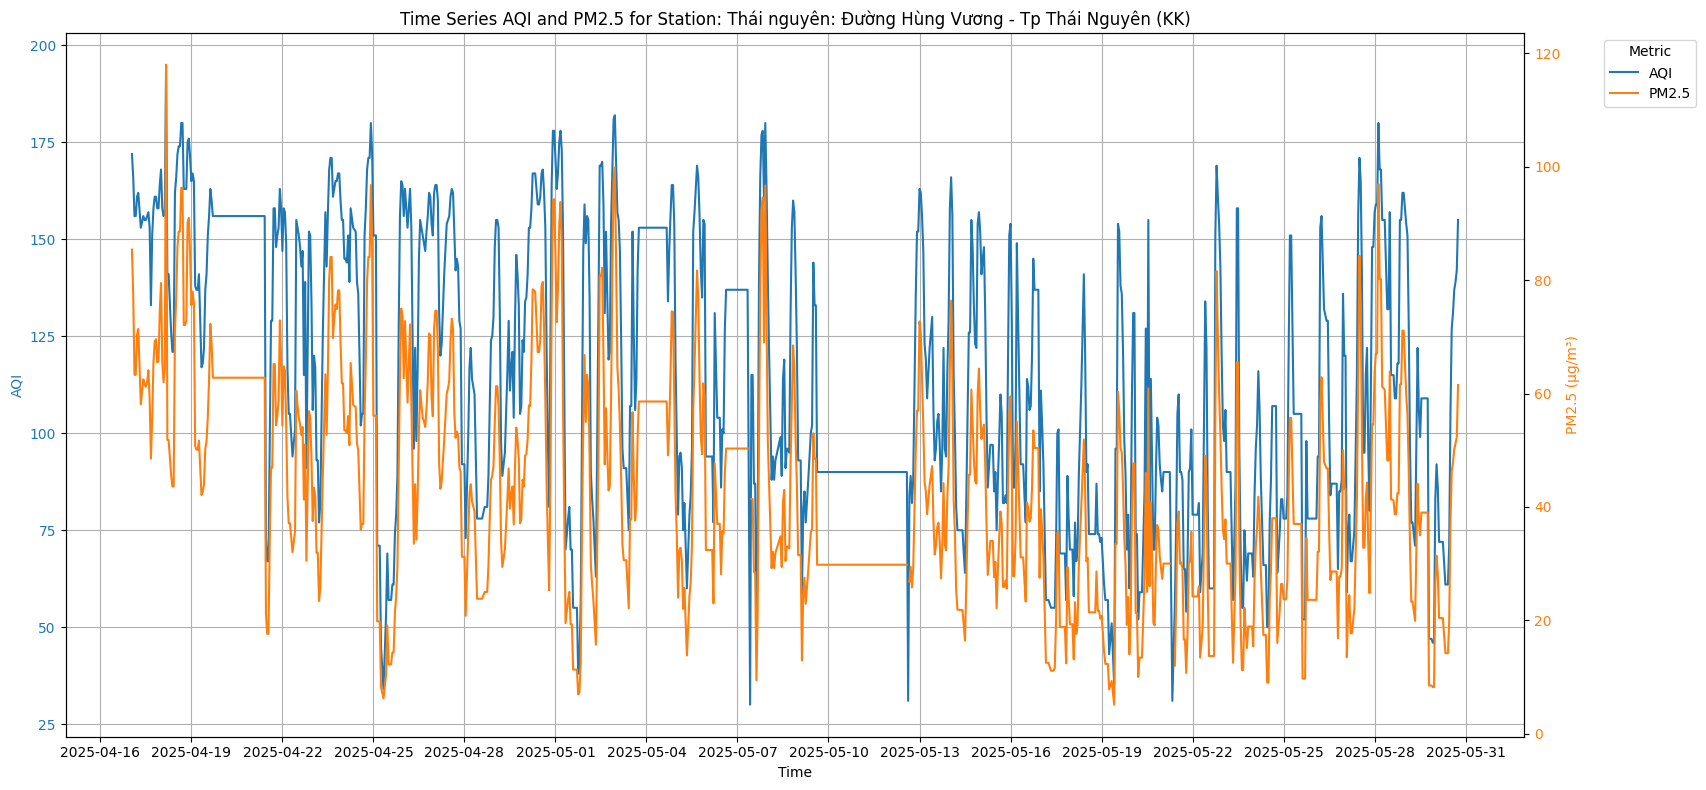

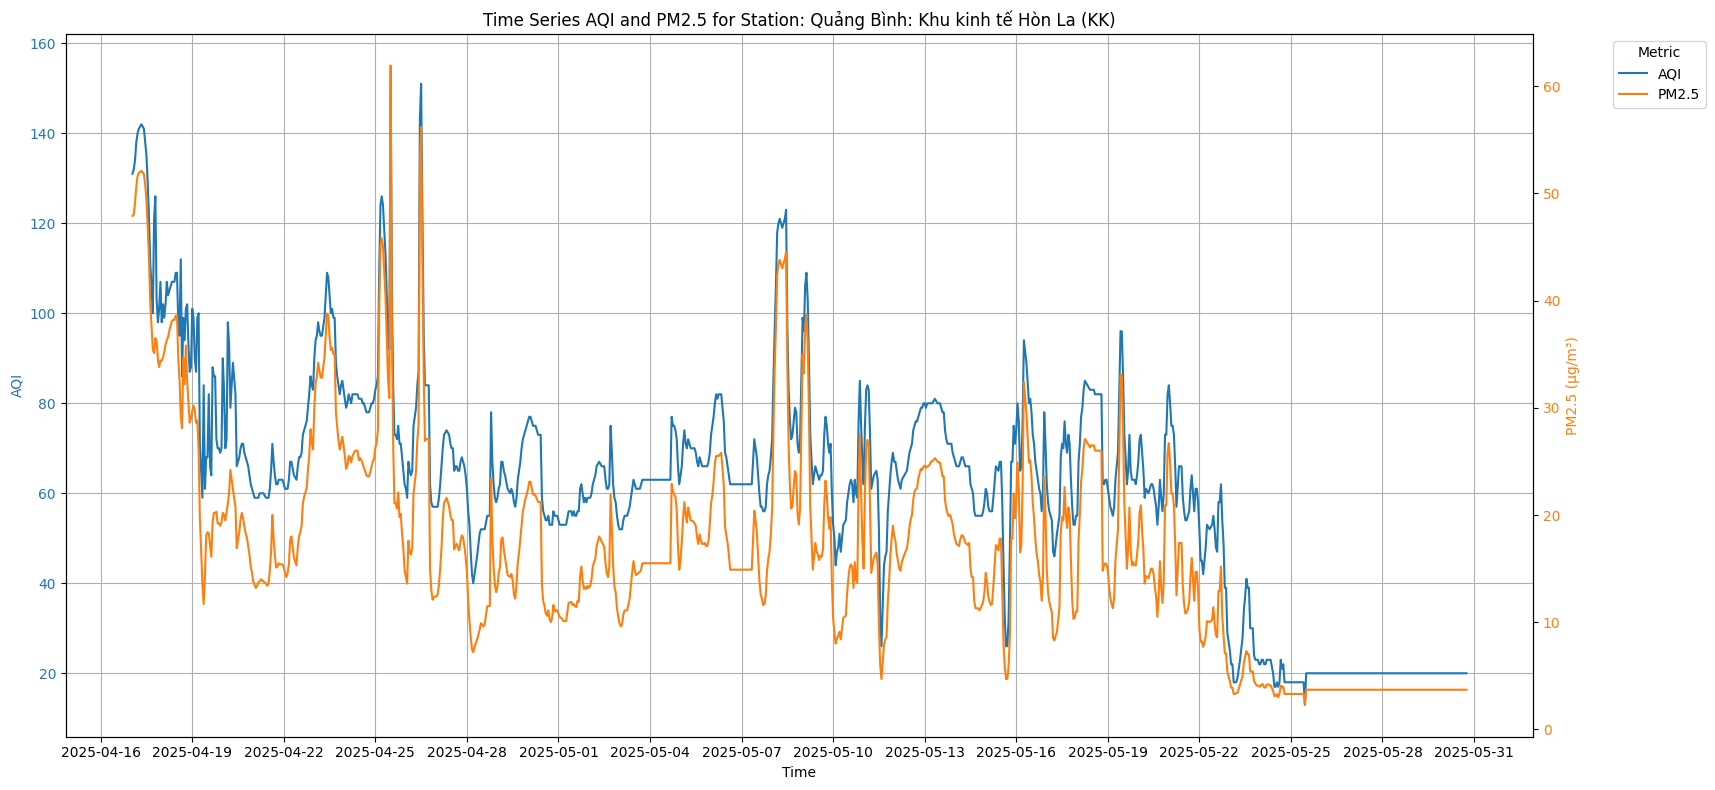

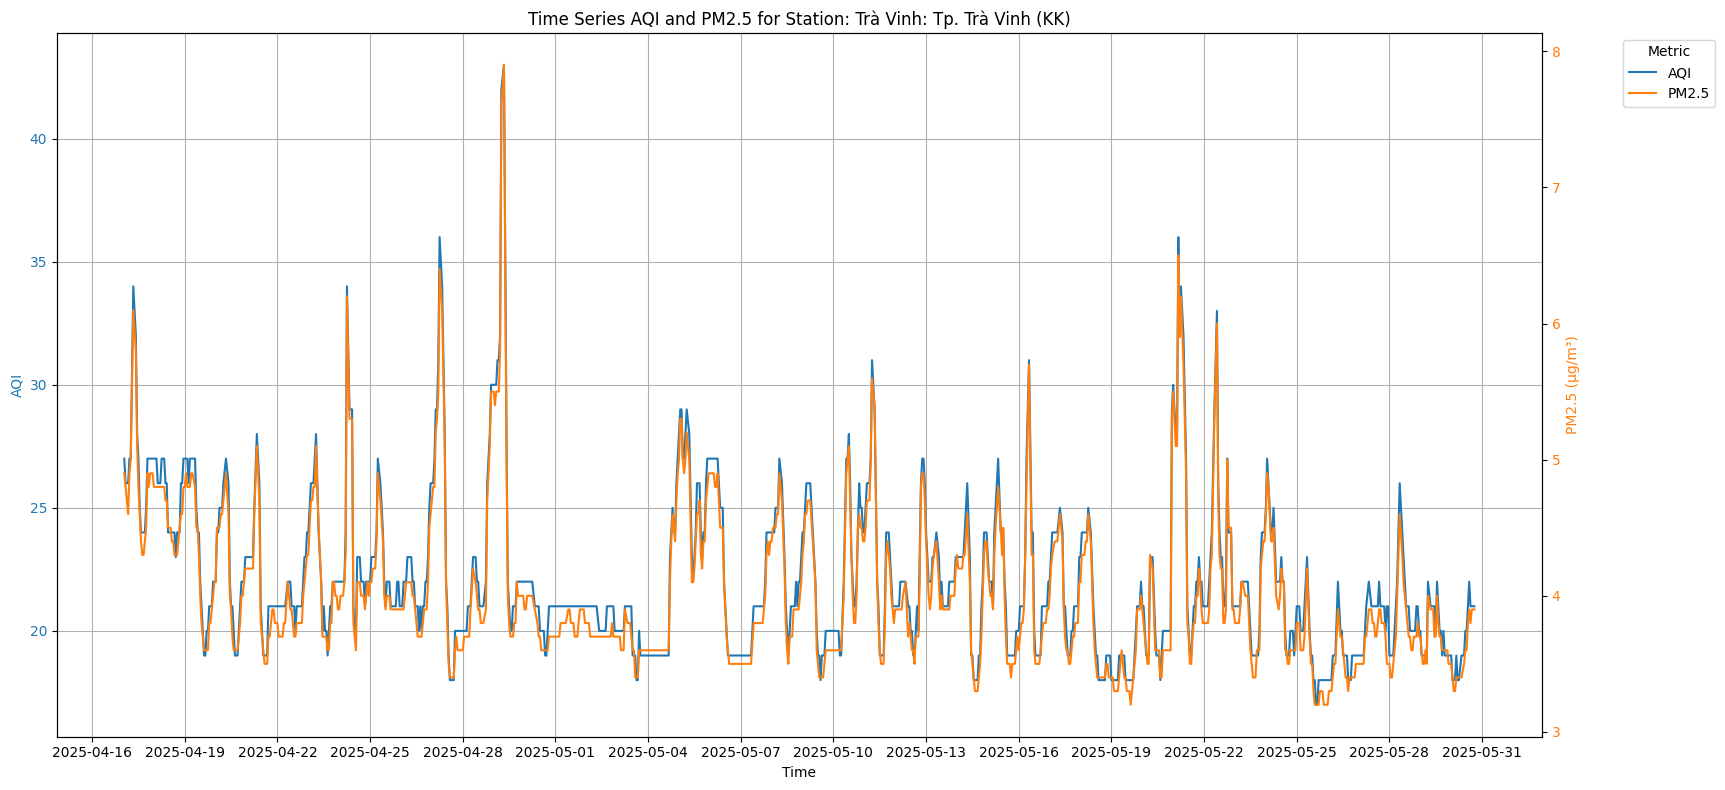

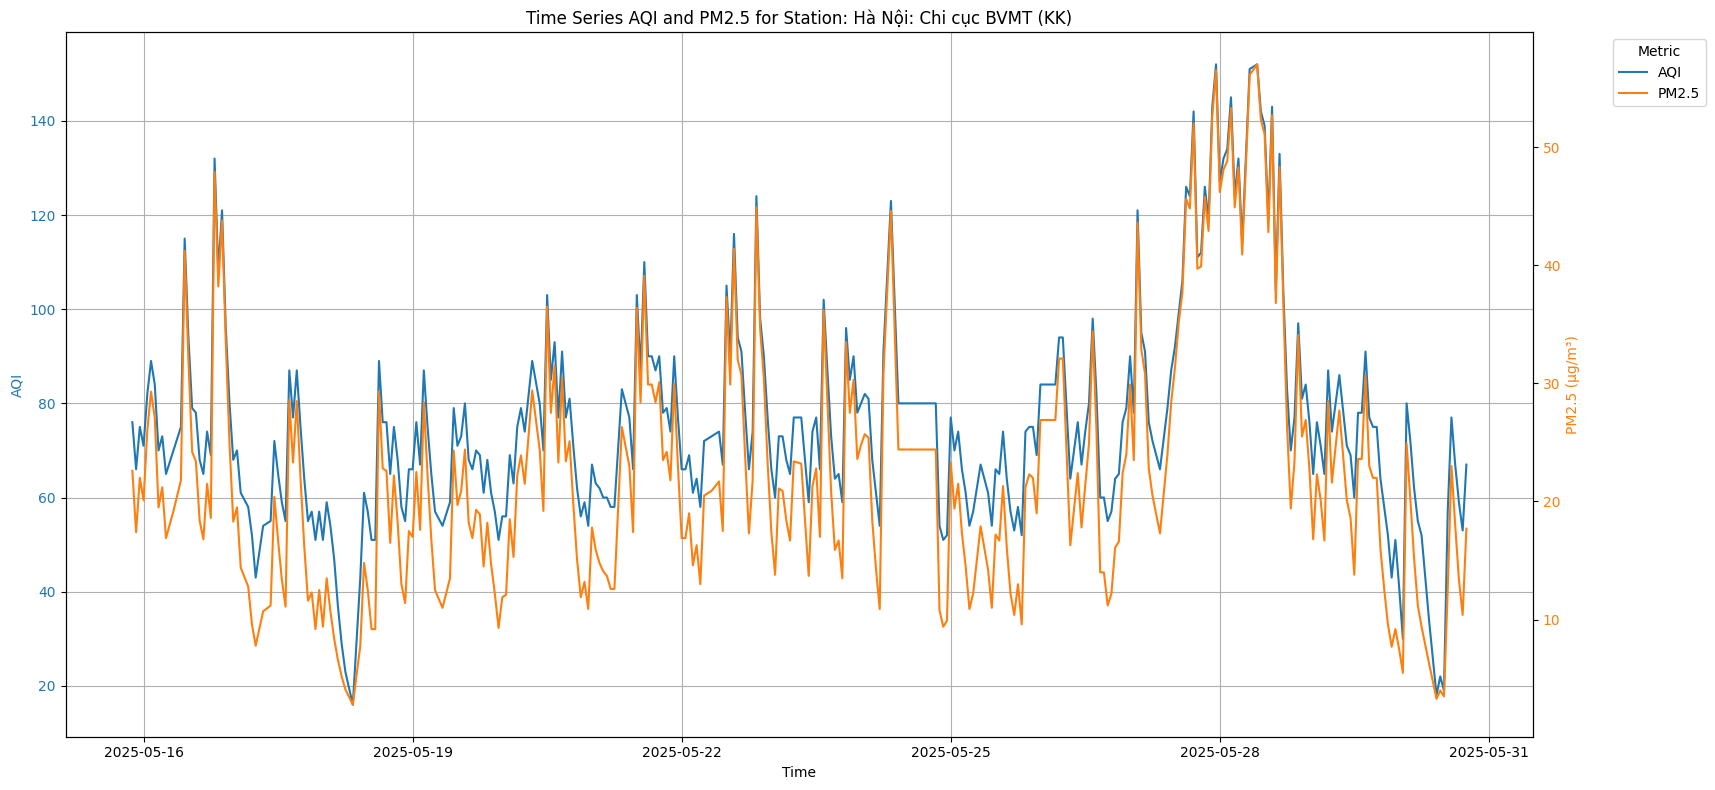

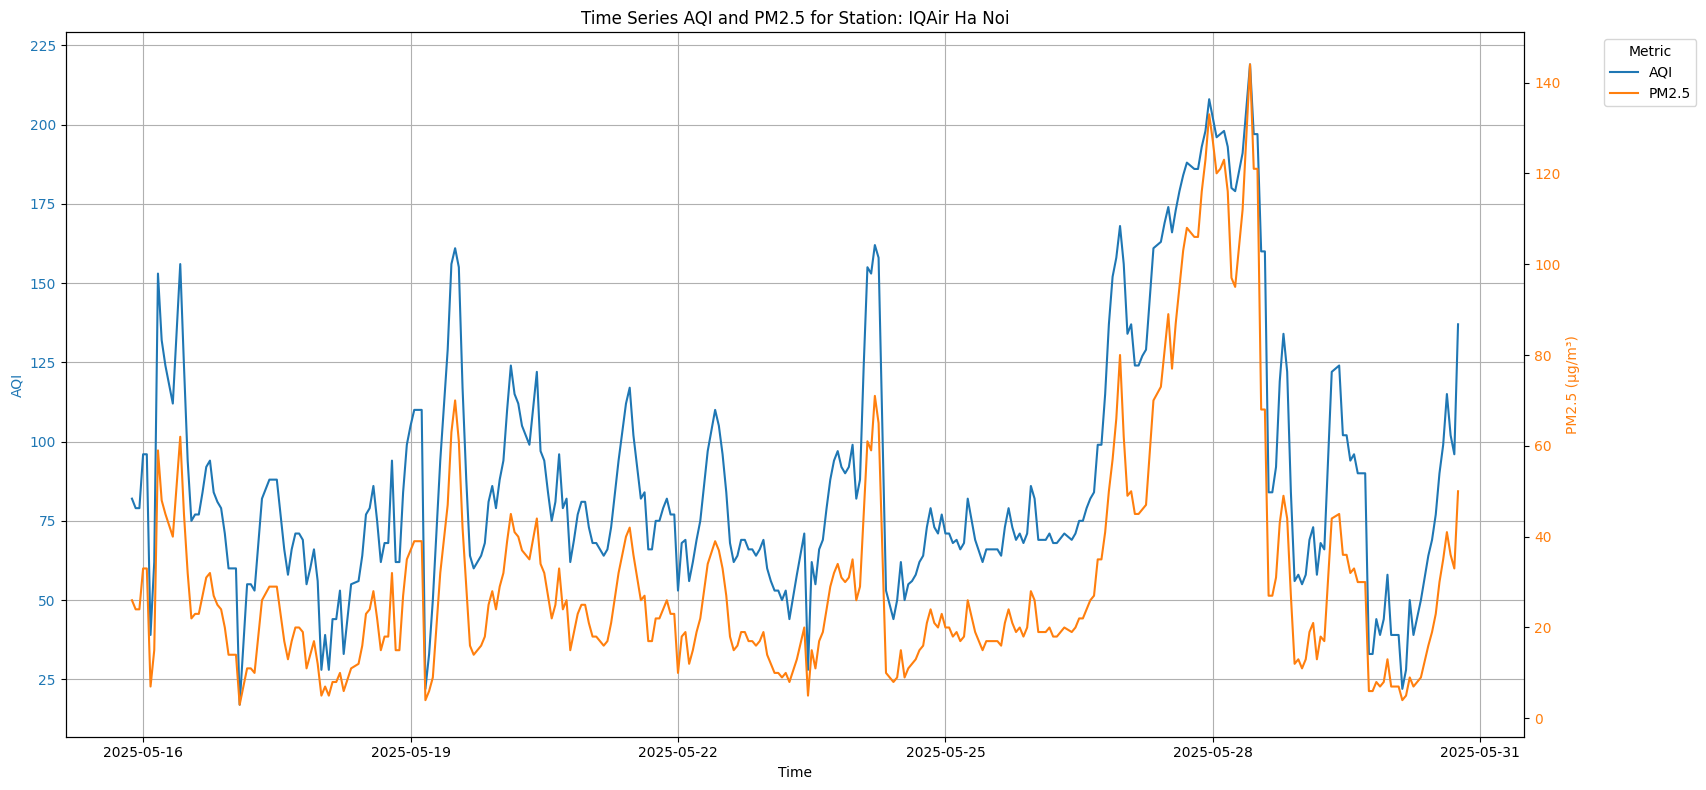

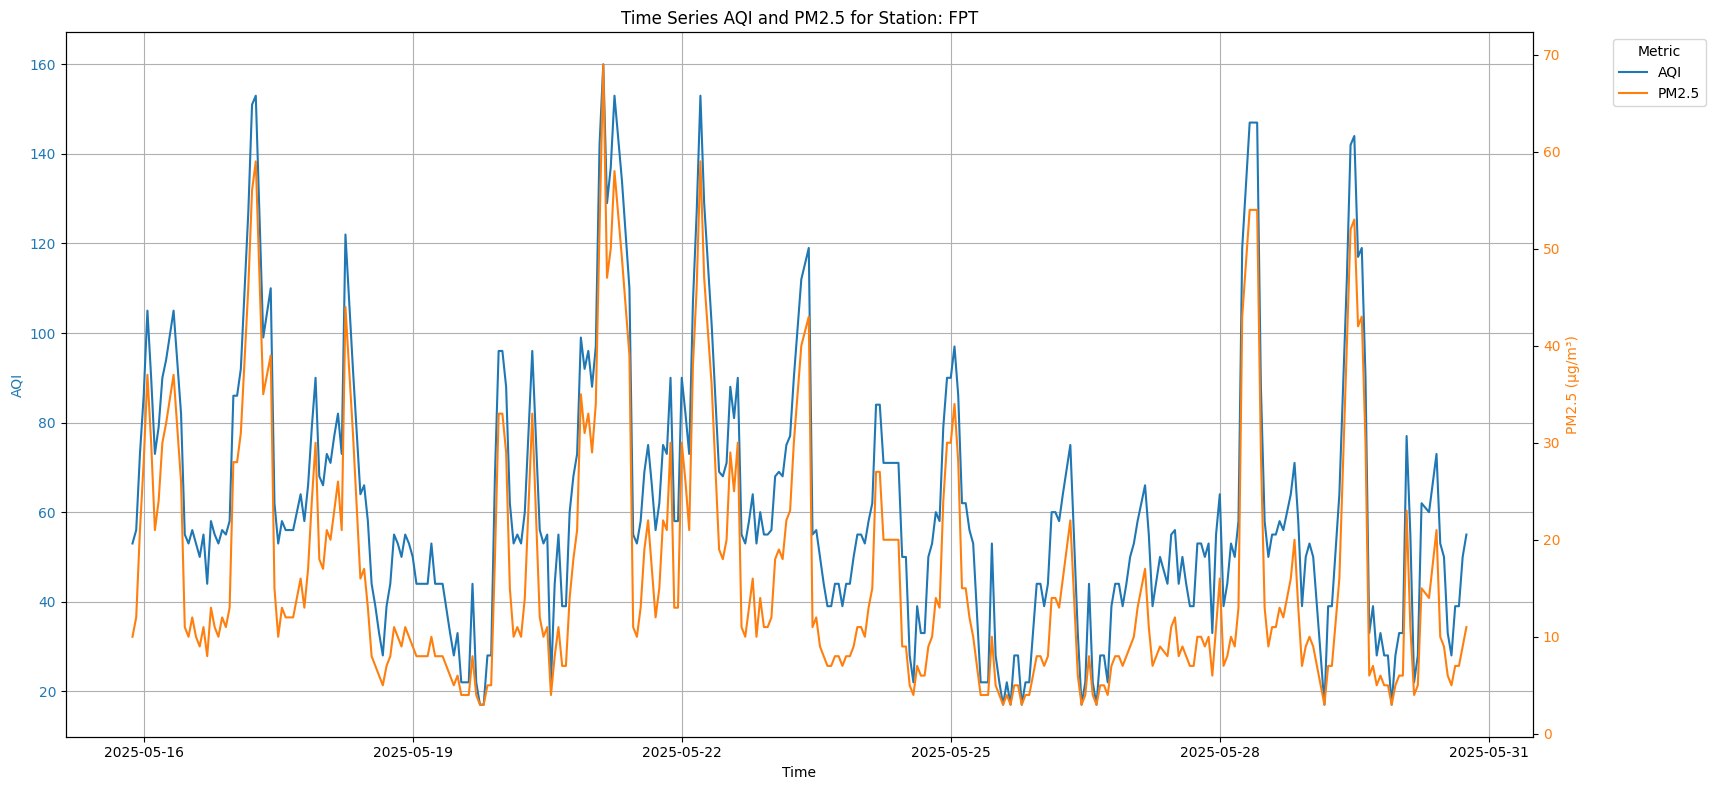

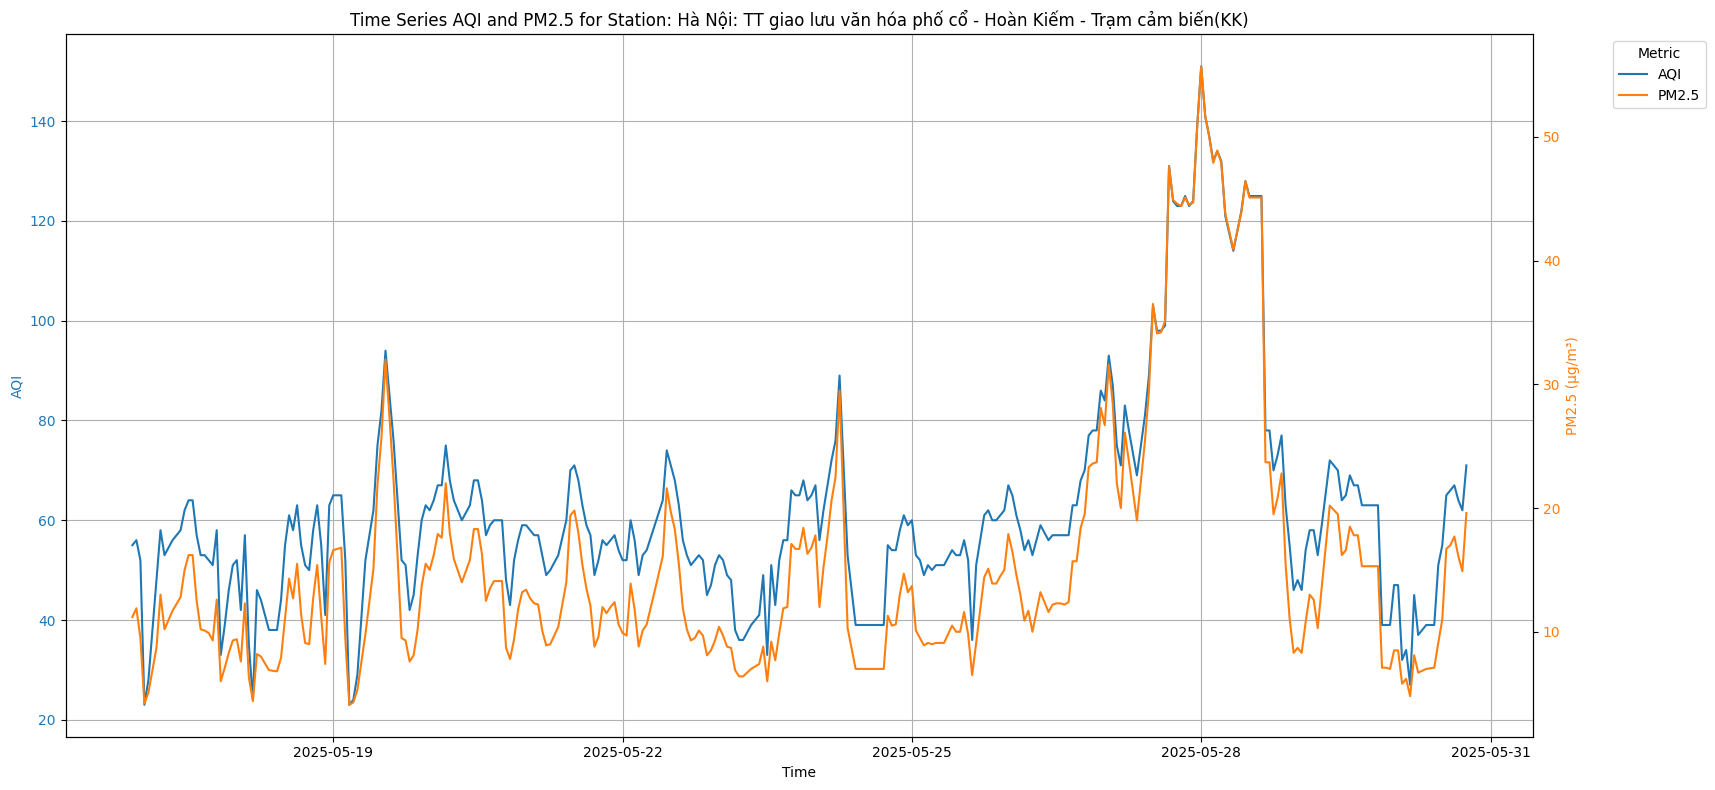

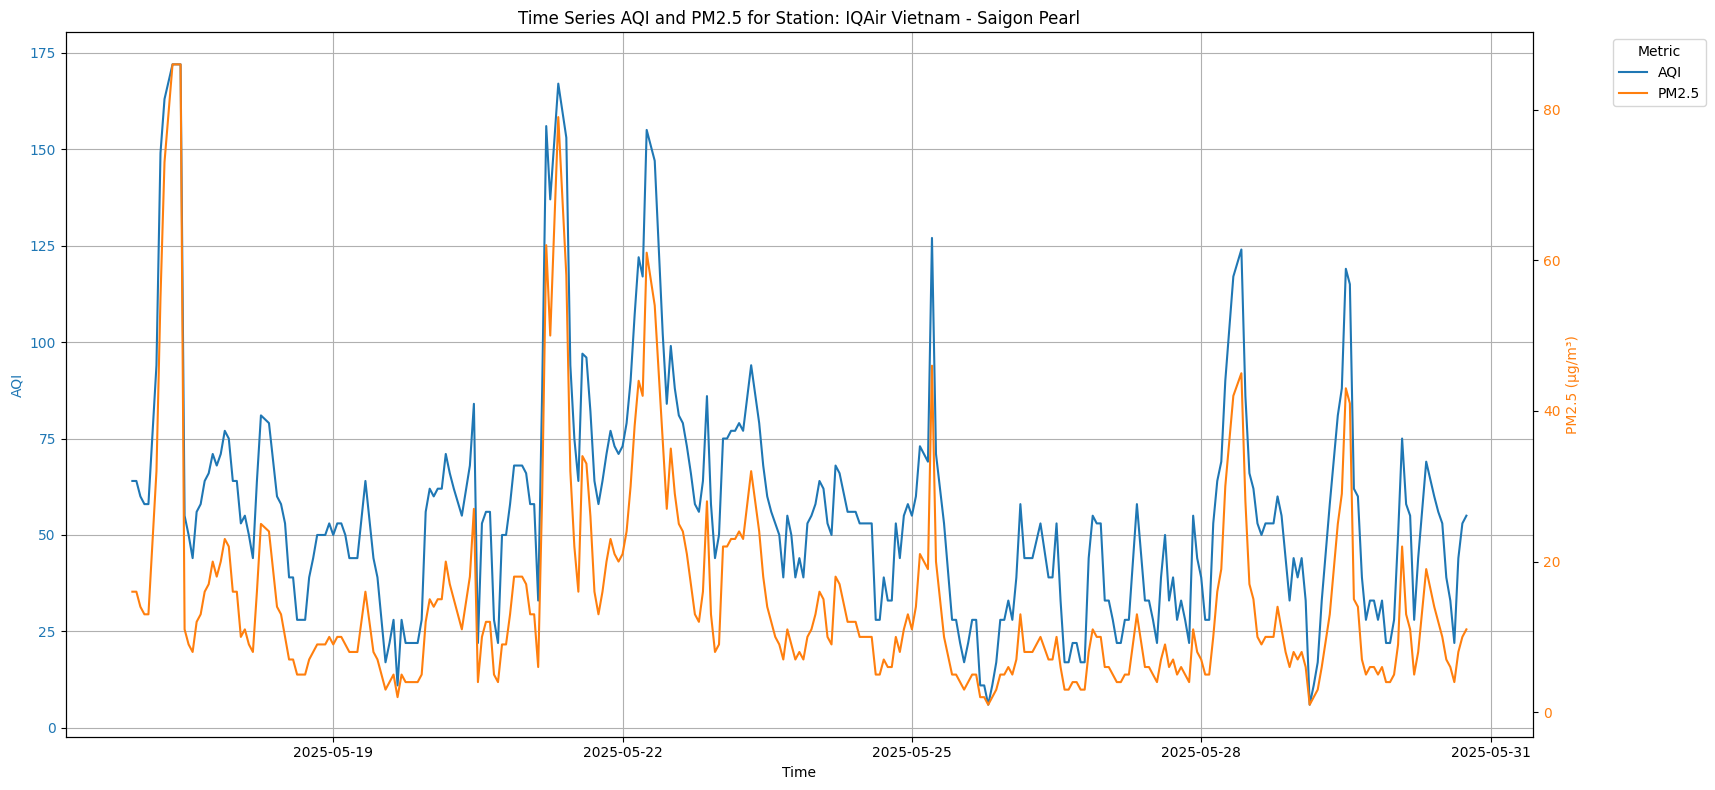

In [5]:
for station in station_names:
    station_df = df[df['station_name'] == station]

    fig, ax1 = plt.subplots(figsize=(16, 8))

    ax1.set_xlabel('Time')
    ax1.set_ylabel('AQI', color='tab:blue')
    ax1.plot(station_df['timestamp'], station_df['aqi'], label='AQI', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('PM2.5 (µg/m³)', color='tab:orange')
    ax2.plot(station_df['timestamp'], station_df['PM2.5 (µg/m³)'], label='PM2.5', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)

    plt.title(f'Time Series AQI and PM2.5 for Station: {station}')
    ax1.grid(True)
    fig.tight_layout()

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()